<a href="https://colab.research.google.com/github/oohlizha/Tugas-Kelompok/blob/main/Cosmetics(UAS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy pandas seaborn matplotlib scipy scikit-learn

In [ ]:
# Aljabar linear
import numpy as np

# Pemrosesan data
import pandas as pd

# Visualisasi data
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Statistik
from scipy.stats import skew, norm, probplot
from scipy.stats import kurtosis
from scipy import stats

# Algoritma machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cosmetics.csv")
df.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [ ]:
# Pemahaman Struktur Data
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


Deskripsi :
* Label: Menyimpan label atau kategori produk kosmetik. Misalnya, produk perawatan kulit, produk make-up, dsb.
* Brand: Nama merek dari produk kosmetik. Misalnya, L'Oréal, Maybelline, dsb.
* Name: Nama atau deskripsi spesifik dari produk kosmetik. Misalnya, "L'Oréal Paris Revitalift", dsb.
* Price: Harga produk kosmetik dalam satuan tertentu (misalnya dolar atau rupiah).
* Rank: Peringkat produk berdasarkan penilaian atau ulasan, biasanya dalam rentang tertentu (misalnya 1-5 atau 1-10).
* Ingredients: Daftar bahan-bahan yang terkandung dalam produk kosmetik.
* Combination: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit kombinasi.
* Dry: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit kering.
* Normal: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit normal.
* Oily: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit berminyak.
* Sensitive: Jumlah review atau skor terkait seberapa cocok produk ini untuk kulit sensitif.

In [ ]:
# Evaluasi Integritas Data
# Memeriksa nilai data yang hilang
missing_values = df.isna().sum().sort_values(ascending = False)
# Tampilkan nilai data yang hilang
print("Nilai-nilai yang Hilang:\n", missing_values)

Nilai-nilai yang Hilang:
 Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64


In [ ]:
# Memeriksa Dulikasi
print("Jumlah baris duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

Jumlah baris duplikat: 0


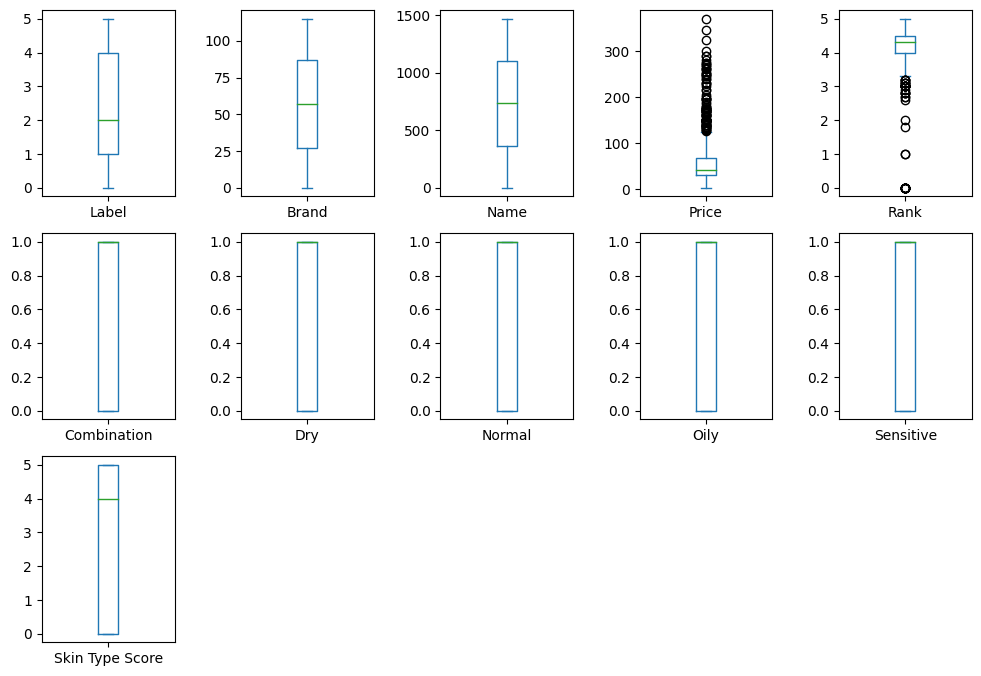

In [ ]:
# Memeriksa Outlier
# Daftar nama kolom yang ingin dihapus
columns_to_drop = ['Ingredients']
# Pilih hanya kolom-kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# cek outlier
numerical_columns.plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

Gambar ini menampilkan sekelompok diagram kotak (box plot), yang merupakan cara standar untuk menampilkan distribusi data berdasarkan ringkasan lima angka: nilai minimum, kuartil pertama (Q1), median, kuartil ketiga (Q3), dan nilai maksimum. Terdapat delapan diagram kotak secara keseluruhan, masing-masing diberi label berbeda seperti Label, Brand, Name, Price, Combination, Dry, Normal, dan Oily. Label-label ini menunjukkan bahwa data mungkin terkait dengan beberapa produk atau item yang telah dievaluasi atau diukur melalui berbagai atribut seperti harga dan kesesuaian untuk jenis kulit yang berbeda (Combination, Dry, Normal, Oily). Diagram kotak ‘Price’ memiliki rentang yang lebih luas dengan outlier yang ditandai oleh titik-titik terpisah di luar garis bawah dan atas.

In [ ]:
# 2.3.5. Memeriksa Outlier
# Memilih hanya atribut numerik
numeric_cols = df.select_dtypes(include='number')
# Menghitung IQR untuk setiap kolom
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
# Mengidentifikasi outlier
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
# Menampilkan atribut numerik yang memiliki outlier
print("Atribut numerik dengan outlier:")
print(outliers[outliers].index)
outliers.sum()

Atribut numerik dengan outlier:
RangeIndex(start=0, stop=1472, step=1)


Price          91
Rank           50
Combination     0
Dry             0
Normal          0
Oily            0
Sensitive       0
dtype: int64

Terima kasih telah memberikan informasi atribut numerik dengan outlier. Berdasarkan data yang Anda berikan, terdapat beberapa atribut dengan nilai outlier:

1. Price: Terdapat 91 nilai outlier pada atribut harga.
2. Rank: Terdapat 50 nilai outlier pada atribut peringkat.
3. Combination: Tidak ada nilai outlier pada atribut kombinasi.
4. Dry: Tidak ada nilai outlier pada atribut kulit kering.
5. Normal: Tidak ada nilai outlier pada atribut kulit normal.
6. Oily: Tidak ada nilai outlier pada atribut kulit berminyak.
7. Sensitive: Tidak ada nilai outlier pada atribut kulit sensitif.

In [ ]:
# Eksplorasi data awal
print("Dimensi dataset:", df.shape)
print("Beberapa baris pertama data:")
print(df.head())
print("Ringkasan statistik deskriptif:")
print(df.describe())

Dimensi dataset: (1472, 11)
Beberapa baris pertama data:
         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

   Price  Rank                                        Ingredients  \
0    175   4.1  Algae (Seaweed) Extract, Mineral Oil, Petrolat...   
1    179   4.1  Galactomyces Ferment Filtrate (Pitera), Butyle...   
2     68   4.4  Water, Dicaprylyl Carbonate, Glycerin, Ceteary...   
3    175   3.8  Algae (Seaweed) Extract, Cyclopentasiloxane, P...   
4     38   4.1  Water, Snail Secretion Filtrate, Phenyl Trimet...   

   Combination  Dry  Normal  Oily  Sensit

Tentu! Data ini merupakan ringkasan statistik deskriptif dari sebuah dataset yang berisi informasi tentang produk-produk perawatan kulit. Berikut adalah beberapa poin penting:

1. **Dimensi Dataset**: Dataset ini memiliki 1472 baris dan 11 kolom.

2. **Beberapa Baris Pertama Data**:
   - Produk pertama adalah "Crème de la Mer" dari merek "LA MER" dengan harga $175 dan peringkat 4.1. Bahan-bahannya termasuk Algae (Seaweed) Extract, Mineral Oil, dan lainnya.
   - Produk kedua adalah "Facial Treatment Essence" dari merek "SK-II" dengan harga $179 dan peringkat 4.1. Bahan utamanya adalah Galactomyces Ferment Filtrate (Pitera).
   - Produk ketiga adalah "Protini™ Polypeptide Cream" dari merek "DRUNK ELEPHANT" dengan harga $68 dan peringkat 4.4. Bahan-bahannya meliputi Water, Dicaprylyl Carbonate, dan Glycerin.
   - Produk keempat adalah "The Moisturizing Soft Cream" dari merek "LA MER" dengan harga $175 dan peringkat 3.8. Bahan-bahannya termasuk Algae (Seaweed) Extract dan Cyclopentasiloxane.
   - Produk kelima adalah "Your Skin But Better™ CC+™ Cream with SPF 50+" dari merek "IT COSMETICS" dengan harga $38 dan peringkat 4.1. Bahan-bahannya mencakup Water, Snail Secretion Filtrate, dan Phenyl Trimethicone.

3. **Ringkasan Statistik Deskriptif**:
   - Rata-rata harga produk adalah $55.58.
   - Rata-rata peringkat produk adalah 4.15.
   - Sekitar 65.6% produk cocok untuk kulit kombinasi, 61.4% cocok untuk kulit kering, 65.2% cocok untuk kulit normal, 60.7% cocok untuk kulit berminyak, dan 51.4% cocok untuk kulit sensitif.

Semoga penjelasan ini membantu! Apakah ada yang lain yang ingin Anda ketahui? 😊

In [ ]:
#Memeriksa Data Tidak Konsisten
# Cek unik nilai pada kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  unique_values = df[col].unique()
print(f'Unique values in {col}: {unique_values}')

Unique values in Ingredients: ['Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat., Fragrance.'
 'Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.'
 'Water, Dicaprylyl Carb

In [ ]:
# Tampilkan kolom DataFrame sebelum menghapus kolom
print("Sebelum menghapus kolom:")
print(df.columns)

# Hapus kolom 'Ingredients'
df.drop(columns=['Ingredients'], inplace=True)

# Tampilkan kolom DataFrame setelah menghapus kolom
print("Setelah menghapus kolom:")
print(df.columns)

Sebelum menghapus kolom:
Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')
Setelah menghapus kolom:
Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Combination', 'Dry',
       'Normal', 'Oily', 'Sensitive'],
      dtype='object')


In [ ]:
# Mengganti nilai dalam kolom 'Label' dengan singkatan yang sesuai
df['Label'] = df['Label'].replace({
    'Moisturizer': 'M',
    'Cleanser': 'C',
    'Treatment': 'T',
    'Face Mask': 'F',
    'Eye cream': 'E',
    'Sun protect': 'S'
})

# 2. Cek konsistensi nilai pada kolom Label
unique_Label_values = df['Label'].unique()
print("\nNilai yang unik pada kolom Label setelah perubahan:")
print(unique_Label_values)



Nilai yang unik pada kolom Label setelah perubahan:
['M' 'C' 'T' 'F' 'E' 'S']


# Visualisasi Data

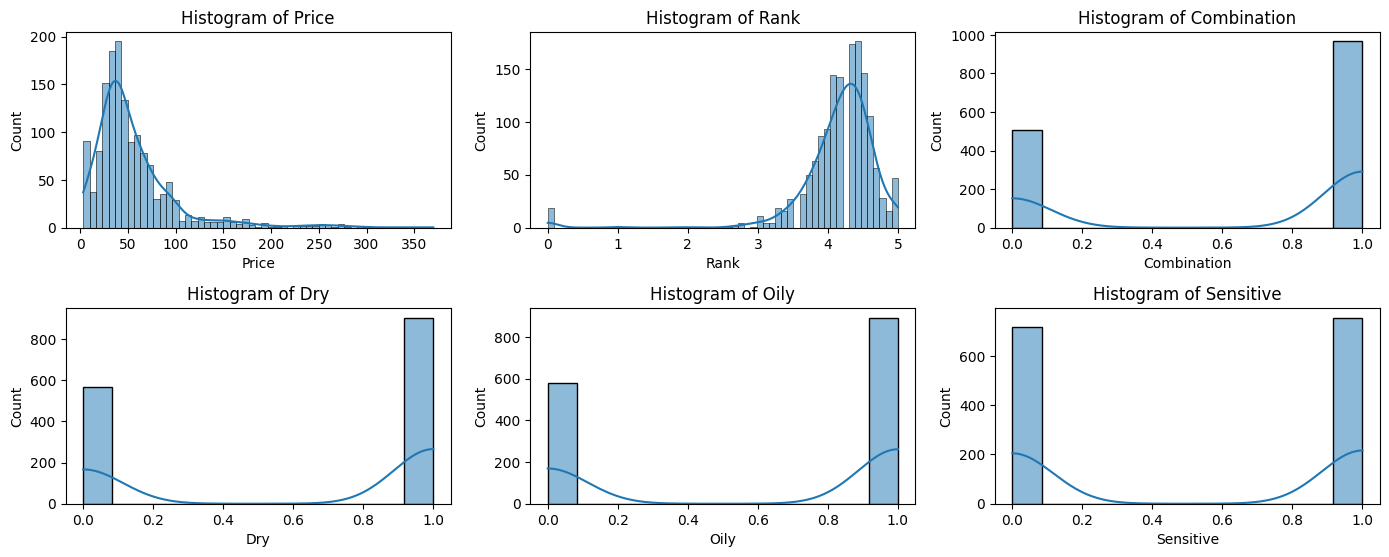

In [ ]:
# Daftar kolom yang akan dibuatkan histogram
columns_to_plot = ['Price', 'Rank', 'Combination', 'Dry', 'Oily', 'Sensitive']

# Membuat subplot untuk histogram
plt.figure(figsize=(14, 8))
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(3, 3, i)
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
plt.tight_layout()
plt.show()

 Gambar ini berisi enam histogram, yang merupakan representasi grafis dari distribusi data. Setiap histogram memiliki dua sumbu: sumbu horizontal (sumbu x) mewakili rentang nilai untuk variabel tertentu, dan sumbu vertikal (sumbu y) mewakili jumlah atau frekuensi titik data yang berada dalam setiap rentang.

Baris pertama mencakup tiga histogram yang diberi label “Histogram Harga,” “Histogram Peringkat,” dan “Histogram Kombinasi.” “Histogram Harga” menunjukkan distribusi condong ke kanan dengan sebagian besar data terkonsentrasi pada ujung bawah. “Histogram Peringkat” juga menampilkan distribusi condong ke kanan, tetapi dengan lebih sedikit batang daripada histogram harga. “Histogram Kombinasi” memiliki kurva yang sangat curam dengan hampir semua data mendekati nol kecuali sedikit kenaikan di salah satu ujung.

Baris kedua menampilkan tiga histogram yang diberi label “Histogram Kulit Kering,” “Histogram Kulit Berminyak,” dan “Histogram Kulit Sensitif.” Histogram ini memiliki lebih sedikit batang, menunjukkan variasi yang lebih rendah dalam dataset masing-masing dibandingkan dengan baris pertama. Distribusi dalam histogram ini tampak lebih seragam atau memiliki satu puncak, berbeda dengan beberapa histogram dari baris pertama yang memiliki beberapa puncak.

1. Label

* Berapa banyak produk dalam setiap kategori label(misalnya, produk perawatan kulit, produk makeup)?

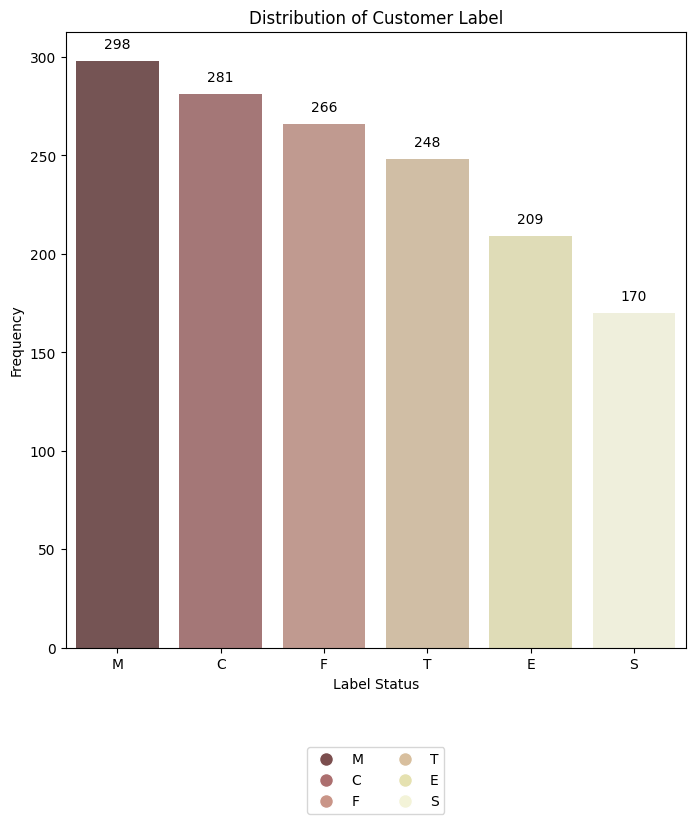

In [ ]:
# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Mengganti nilai dalam DataFrame duplikat dengan label yang sesuai
df_temp['Label'] = df_temp['Label'].replace({1: 'Label', 0: 'Not Label'})

# Hitung jumlah observasi distribusi data Label
Label_counts = df_temp['Label'].value_counts()

# Persiapan data untuk bar chart
labels = Label_counts.index
values = Label_counts.values

# Plot bar chart
plt.figure(figsize=(8, 8))
bars = sns.barplot(x=labels, y=values, hue=labels, palette="pink", dodge=False)

# Tambahkan nilai data pada grafik
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan legend berdasarkan warna pada sumbu x
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=sns.color_palette("pink")[i], markersize=10)
                 for i, label in enumerate(labels)]

plt.title('Distribution of Customer Label')
plt.xlabel('Label Status')
plt.ylabel('Frequency')

# Letakkan legend pada posisi bawah
plt.legend(handles=legend_labels, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

plt.show()


In [ ]:
# Statistik deskriptif
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1472.0,55.584239,45.014429,3.0,30.0,42.5,68.0,370.0
Rank,1472.0,4.153261,0.633918,0.0,4.0,4.3,4.5,5.0
Combination,1472.0,0.656250,0.475120,0.0,0.0,1.0,1.0,1.0
Dry,1472.0,0.614130,0.486965,0.0,0.0,1.0,1.0,1.0
Normal,1472.0,0.652174,0.476442,0.0,0.0,1.0,1.0,1.0
Oily,1472.0,0.607337,0.488509,0.0,0.0,1.0,1.0,1.0
Sensitive,1472.0,0.513587,0.499985,0.0,0.0,1.0,1.0,1.0


Tentu! Data ini merupakan ringkasan statistik deskriptif dari sebuah dataset yang berisi informasi tentang produk-produk perawatan kulit. Berikut adalah beberapa poin penting:

1. **Harga (Price)**:
   - Rata-rata harga produk adalah $55.58.
   - Standar deviasi harga adalah $45.01.
   - Harga minimum adalah $3.00, dan harga maksimum adalah $370.00.

2. **Peringkat (Rank)**:
   - Rata-rata peringkat produk adalah 4.15.
   - Standar deviasi peringkat adalah 0.63.
   - Peringkat minimum adalah 0.0, dan peringkat maksimum adalah 5.0.

3. **Kombinasi (Combination)**:
   - Sekitar 65.6% produk cocok untuk kulit kombinasi.

4. **Kulit Kering (Dry)**:
   - Sekitar 61.4% produk cocok untuk kulit kering.

5. **Kulit Normal (Normal)**:
   - Sekitar 65.2% produk cocok untuk kulit normal.

6. **Kulit Berminyak (Oily)**:
   - Sekitar 60.7% produk cocok untuk kulit berminyak.

7. **Kulit Sensitif (Sensitive)**:
   - Sekitar 51.4% produk cocok untuk kulit sensitif.

Semoga penjelasan ini membantu! Apakah ada yang lain yang ingin Anda ketahui? 😊

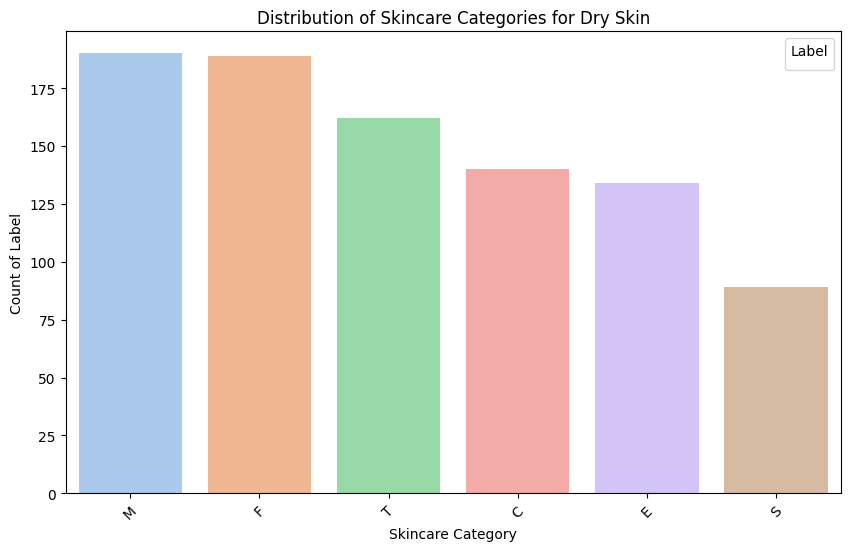

In [ ]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Dry"
dry_skin_data = df[df['Dry'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
dry_skin_counts = dry_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=dry_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Dry Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

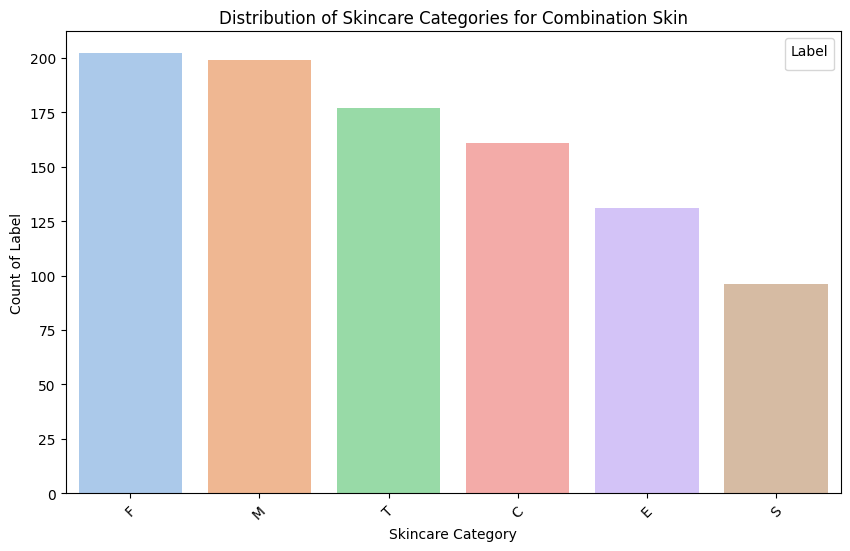

In [ ]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Combination"
Combination_skin_data = df[df['Combination'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
Combination_skin_counts = Combination_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=Combination_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Combination Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

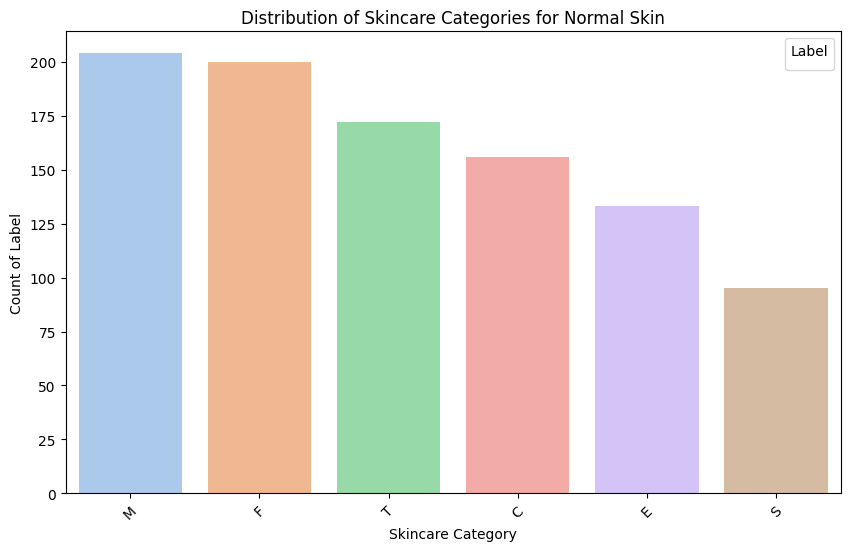

In [ ]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Normal"
Normal_skin_data = df[df['Normal'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
Normal_skin_counts = Normal_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=Normal_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Normal Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

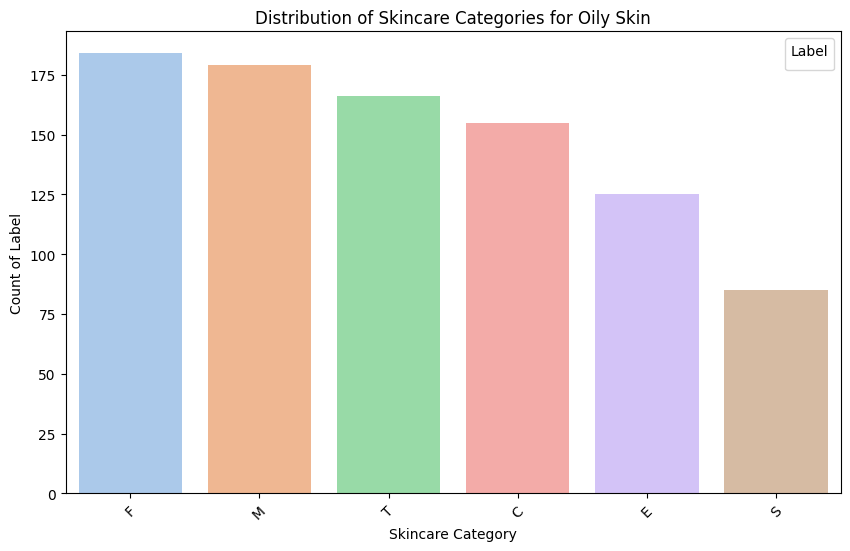

In [ ]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Oily"
Oily_skin_data = df[df['Oily'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
Oily_skin_counts = Oily_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=Oily_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Oily Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

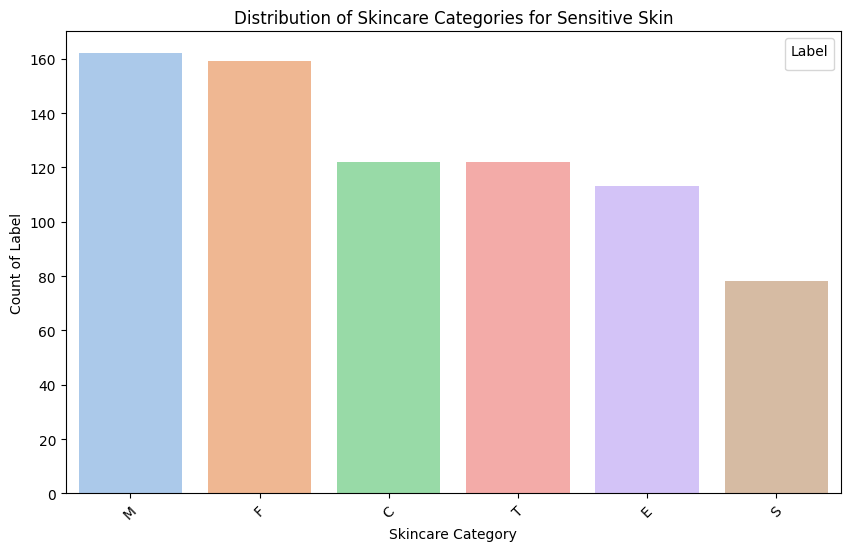

In [ ]:
# Filter data untuk hanya mencakup produk dengan nilai "1" di kolom "Sensitive"
Sensitive_skin_data = df[df['Sensitive'] == 1]

# Kelompokkan produk berdasarkan kategori moisturizer dan hitung jumlah produk dalam setiap kelompok
Sensitive_skin_counts = Sensitive_skin_data['Label'].value_counts().reset_index(name='Count')

# Buat bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=Sensitive_skin_counts, x='Label', y='Count', hue='Label', palette='pastel', dodge=False)
plt.title('Distribution of Skincare Categories for Sensitive Skin')
plt.xlabel('Skincare Category')
plt.ylabel('Count of Label')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.legend(title='Label', loc='upper right')
plt.show()

2. Brand
* Merek kosmetik mana yang paling banyak muncul dalam dataset?

In [ ]:
# Asumsikan kolom yang berisi merek kosmetik bernama 'Brand'
# Ganti 'Brand' dengan nama kolom yang sesuai jika berbeda
brand_counts = df['Brand'].value_counts()

# Tampilkan merek kosmetik yang paling sering muncul
print("Merek kosmetik yang paling sering muncul:")
print(brand_counts.head(10))  # Tampilkan 10 merek teratas

Merek kosmetik yang paling sering muncul:
Brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
PETER THOMAS ROTH     46
KIEHL'S SINCE 1851    46
FRESH                 44
DR. JART+             41
KATE SOMERVILLE       35
Name: count, dtype: int64


3. Price
* Berapa harga rata-rata produk kosmetik dalam dataset?
* Apa distribusi harga produk kosmetik?

In [ ]:
average_price = df['Price'].mean()

# Tampilkan harga rata-rata produk kosmetik
print(f"Harga rata-rata produk kosmetik: {average_price:.2f}")

Harga rata-rata produk kosmetik: 55.58


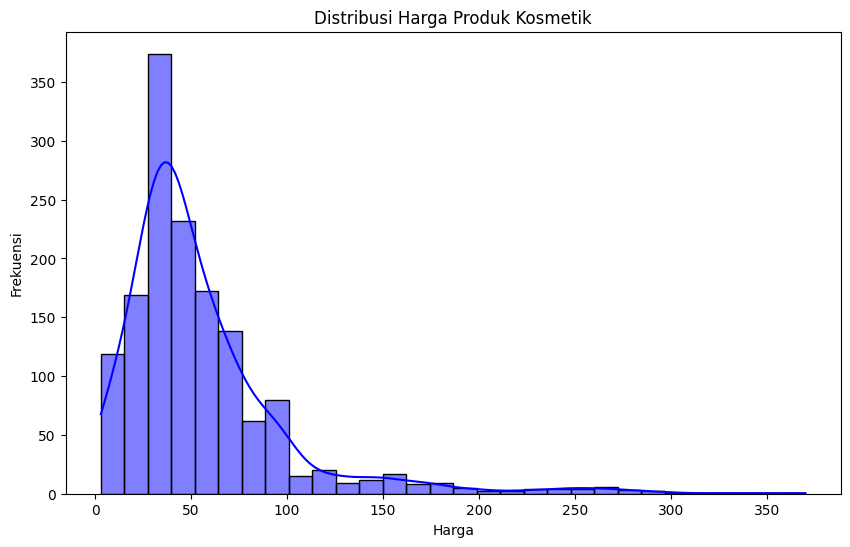

Statistik deskriptif harga produk kosmetik:
count    1472.000000
mean       55.584239
std        45.014429
min         3.000000
25%        30.000000
50%        42.500000
75%        68.000000
max       370.000000
Name: Price, dtype: float64


In [ ]:
# Jika kolom 'Price' dalam bentuk string dengan tanda mata uang, konversi ke float
# Misalnya, jika harga berbentuk '$123.45', kita perlu menghapus tanda '$'
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Visualisasi dengan Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribusi Harga Produk Kosmetik')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

# Statistik Deskriptif
price_descriptive_stats = df['Price'].describe()
print("Statistik deskriptif harga produk kosmetik:")
print(price_descriptive_stats)

Tentu! Data ini merupakan ringkasan statistik deskriptif dari sebuah dataset yang berisi informasi tentang produk-produk perawatan kulit. Berikut adalah beberapa poin penting:

1. **Harga (Price)**:
   - Rata-rata harga produk adalah $55.58.
   - Standar deviasi harga adalah $45.01.
   - Harga minimum adalah $3.00, dan harga maksimum adalah $370.00.

2. **Peringkat (Rank)**:
   - Rata-rata peringkat produk adalah 4.15.
   - Standar deviasi peringkat adalah 0.63.
   - Peringkat minimum adalah 0.0, dan peringkat maksimum adalah 5.0.

3. **Kombinasi (Combination)**:
   - Sekitar 65.6% produk cocok untuk kulit kombinasi.

4. **Kulit Kering (Dry)**:
   - Sekitar 61.4% produk cocok untuk kulit kering.

5. **Kulit Normal (Normal)**:
   - Sekitar 65.2% produk cocok untuk kulit normal.

6. **Kulit Berminyak (Oily)**:
   - Sekitar 60.7% produk cocok untuk kulit berminyak.

7. **Kulit Sensitif (Sensitive)**:
   - Sekitar 51.4% produk cocok untuk kulit sensitif.

Gambar ini menampilkan histogram dengan grafik garis yang berjudul “Distribusi Harga Produk Kosmetik.” Sumbu x diberi label “Harga,” yang menunjukkan harga produk, dan sumbu y diberi label “Frekuensi,” yang menunjukkan frekuensi data. Histogram menampilkan distribusi titik data yang puncaknya berada di sekitar rentang harga 50-100 dan kemudian secara perlahan menurun. Grafik garis tampaknya merupakan estimasi kerapatan kernel yang menunjukkan tren distribusi harga produk kosmetik. Gambar ini relevan karena memberikan representasi visual tentang bagaimana harga produk kosmetik didistribusikan, yang dapat berguna untuk analisis pasar atau studi perilaku konsumen.

4.	Rank
* Berapa rata-rata peringkat produk kosmetik?
* Bagaimana distribusi peringkat produk kosmetik?

In [ ]:
# Filter data untuk hanya mencakup produk dengan Combination=1
filtered_df = df[df['Combination'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Kombinasi")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Kombinasi
Top 10 Brand Terbaik untuk Label 'M':
    Label                Brand      Rank
216     M   REN CLEAN SKINCARE  4.900000
193     M                GO-TO  4.800000
175     M                BELIF  4.633333
227     M  YOUTH TO THE PEOPLE  4.600000
208     M              LANEIGE  4.600000
217     M        SATURDAY SKIN  4.600000
221     M           SON & PARK  4.600000
176     M            BIOSSANCE  4.500000
198     M           JACK BLACK  4.500000
206     M               LANCER  4.500000

Top 10 Brand Terbaik untuk Label 'C':
   Label                      Brand  Rank
10     C                 CLARISONIC   5.0
18     C                ERNO LASZLO   5.0
8      C          CHARLOTTE TILBURY   4.9
25     C                      GO-TO   4.9
4      C                  BIOSSANCE   4.8
39     C                     NUFACE   4.7
32     C                     KORRES   4.6
0      C               AMOREPACIFIC   4.6
1      C               BAREMINERALS   4.6
14     C  DR. DENNIS GROSS SKINCARE 

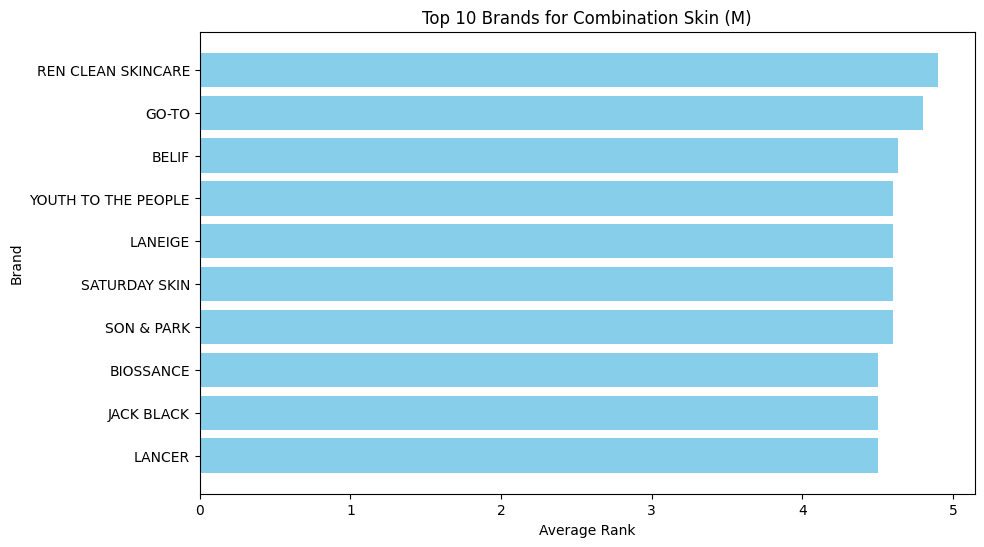

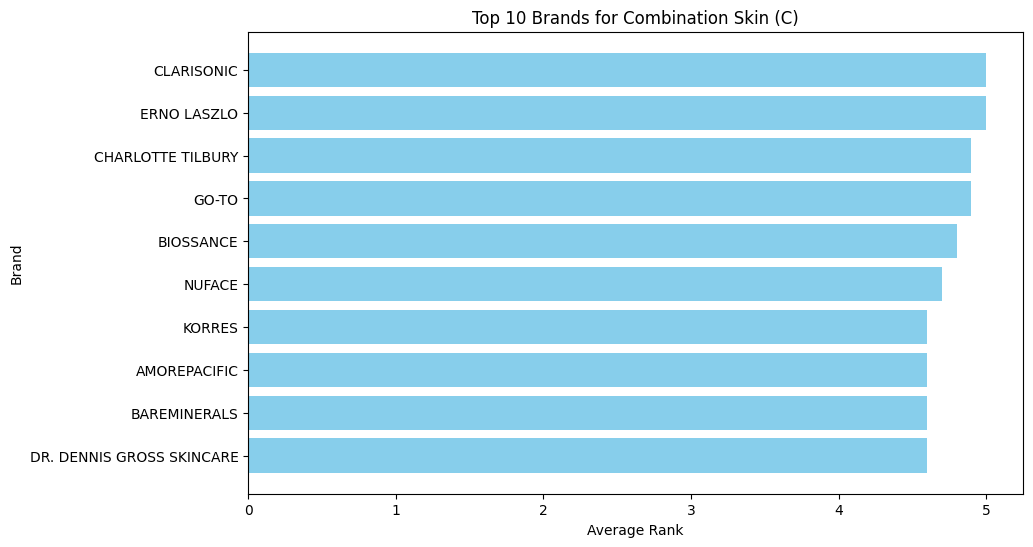

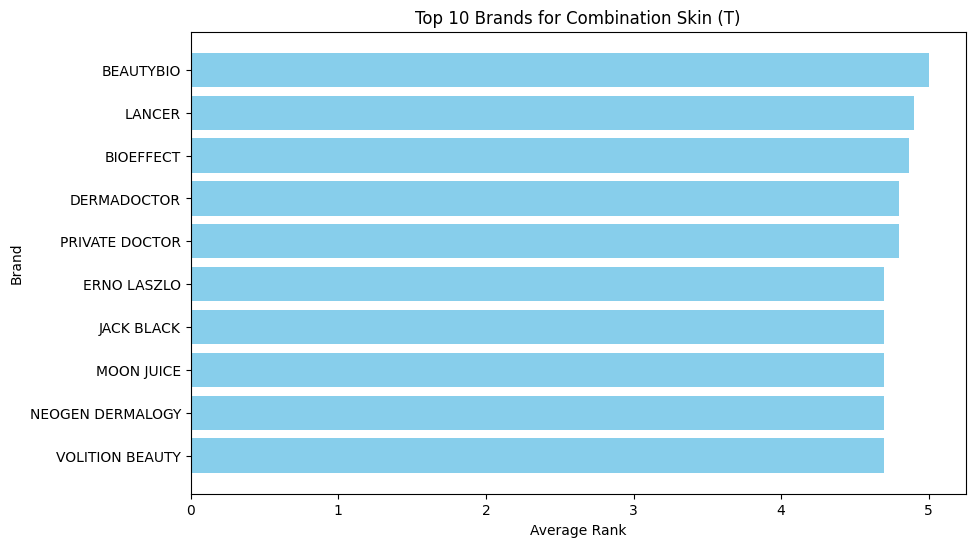

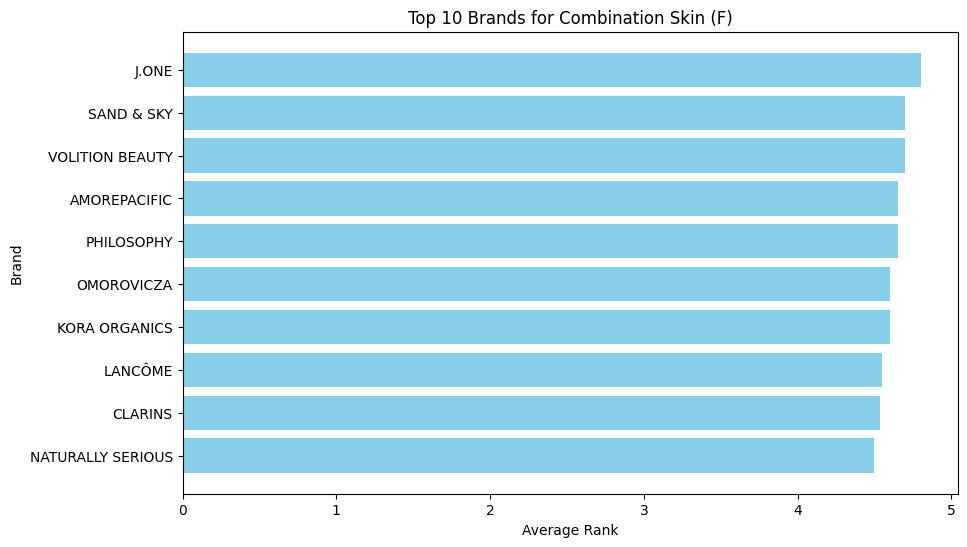

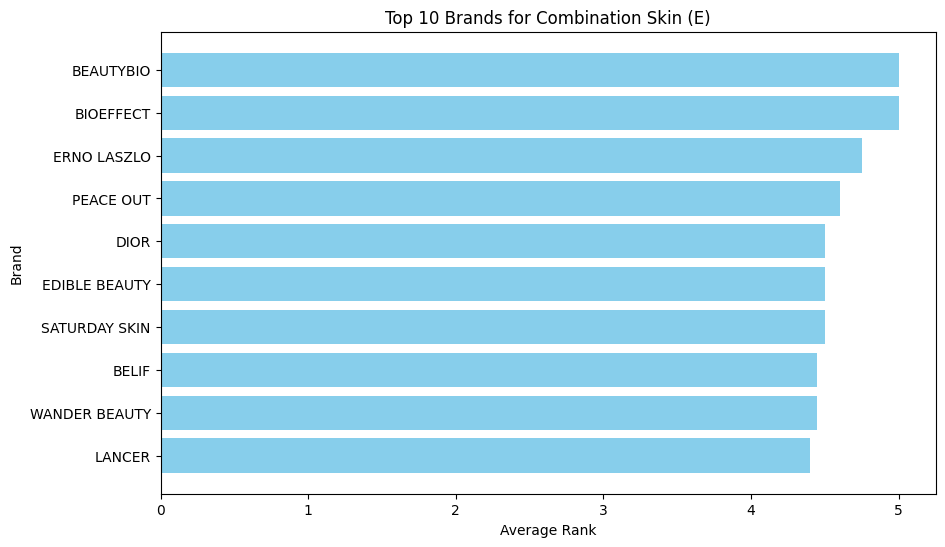

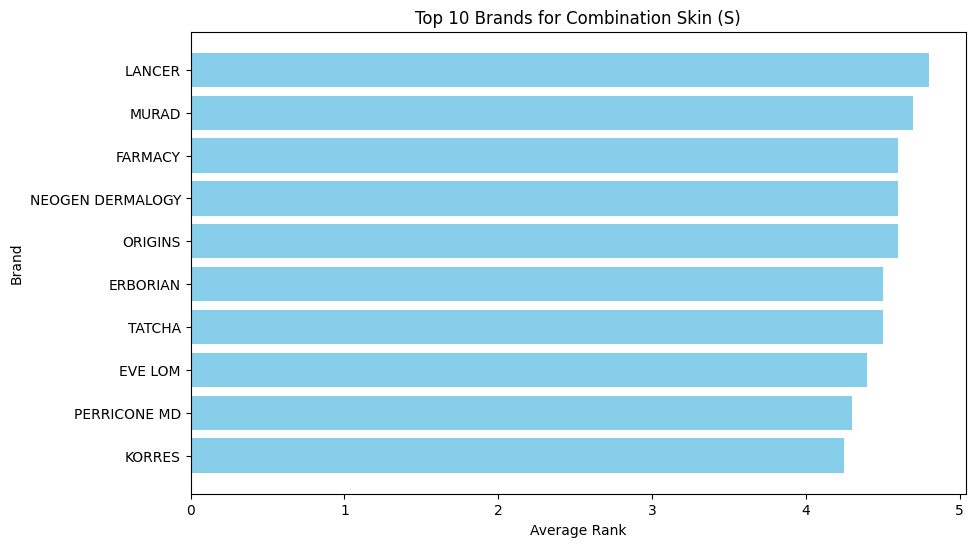

In [ ]:
# Filter data untuk hanya mencakup produk dengan Combination=1
filtered_df = df[df['Combination'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Combination Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

In [ ]:
# Filter data untuk hanya mencakup produk dengan Dry=1
filtered_df = df[df['Dry'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Kering")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Kering
Top 10 Brand Terbaik untuk Label 'M':
    Label                Brand      Rank
211     M   REN CLEAN SKINCARE  4.900000
189     M                GO-TO  4.800000
222     M  YOUTH TO THE PEOPLE  4.800000
172     M                BELIF  4.666667
212     M        SATURDAY SKIN  4.600000
216     M           SON & PARK  4.600000
203     M              LANEIGE  4.560000
173     M            BIOSSANCE  4.500000
201     M               LANCER  4.500000
199     M               KORRES  4.400000

Top 10 Brand Terbaik untuk Label 'C':
   Label                Brand  Rank
10     C           CLARISONIC   5.0
18     C          ERNO LASZLO   5.0
8      C    CHARLOTTE TILBURY   4.9
25     C                GO-TO   4.9
4      C            BIOSSANCE   4.8
0      C         AMOREPACIFIC   4.7
13     C  DR. BRANDT SKINCARE   4.7
37     C               NUFACE   4.7
31     C               KORRES   4.6
1      C         BAREMINERALS   4.6

Top 10 Brand Terbaik untuk Label 'T':
    Label             Br

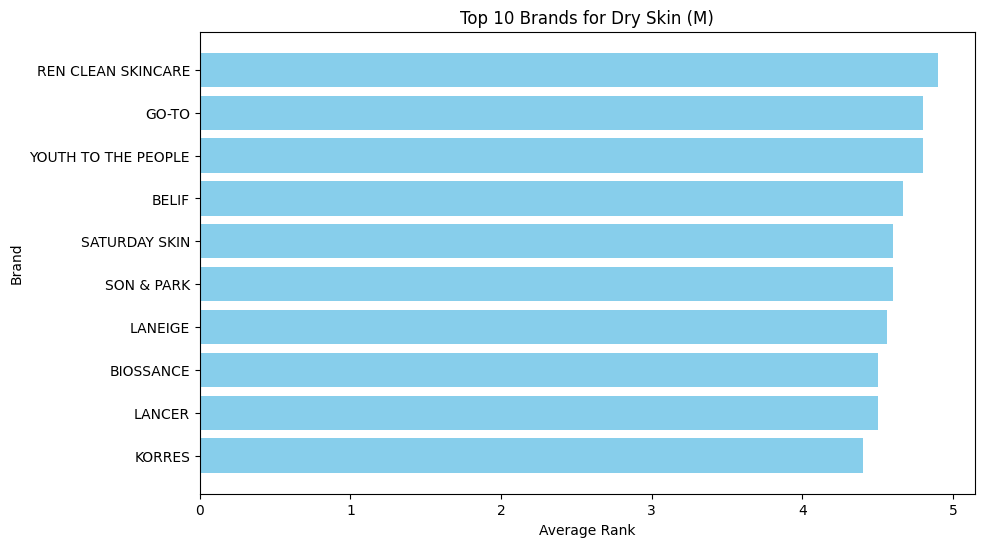

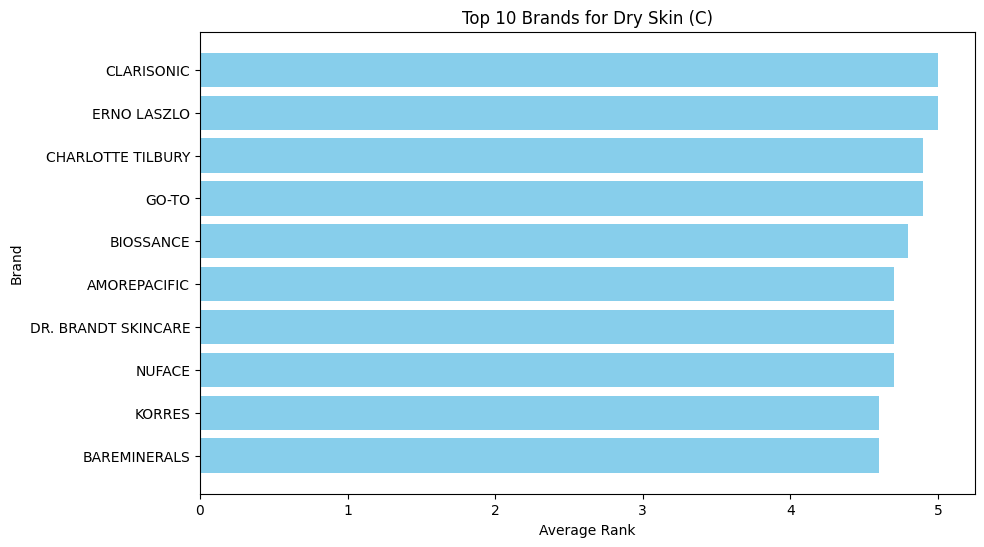

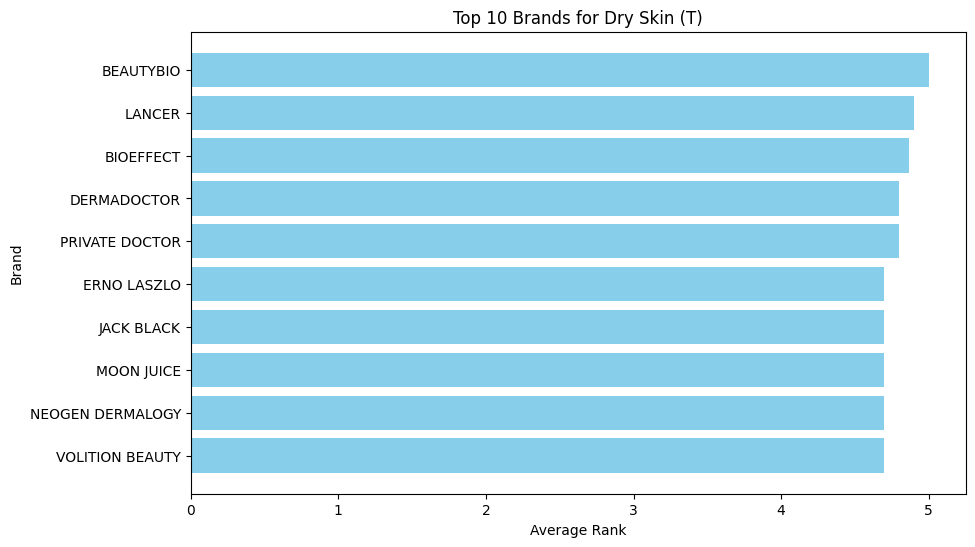

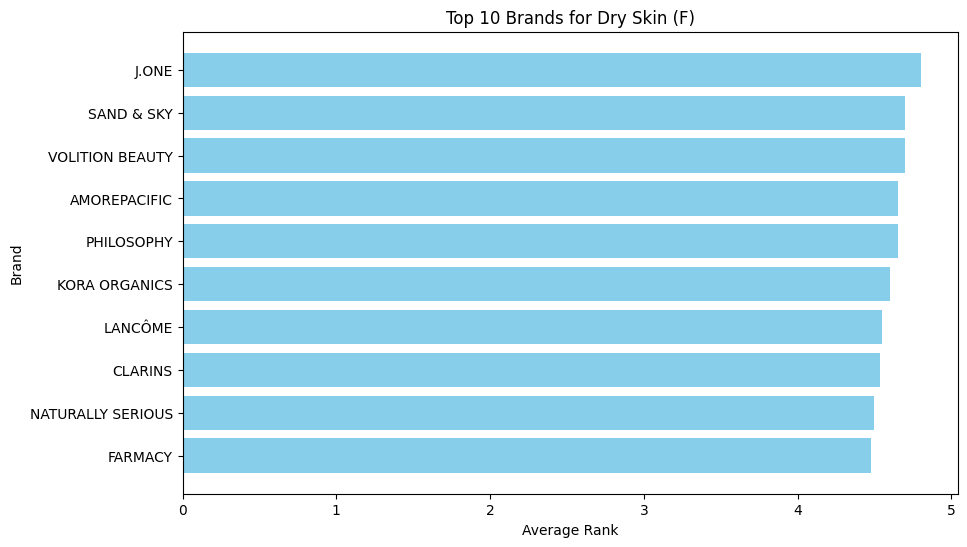

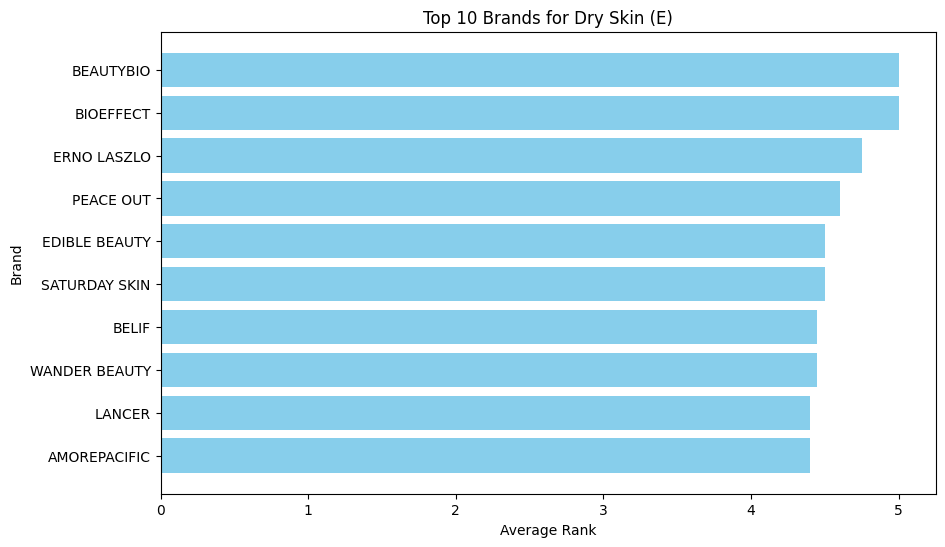

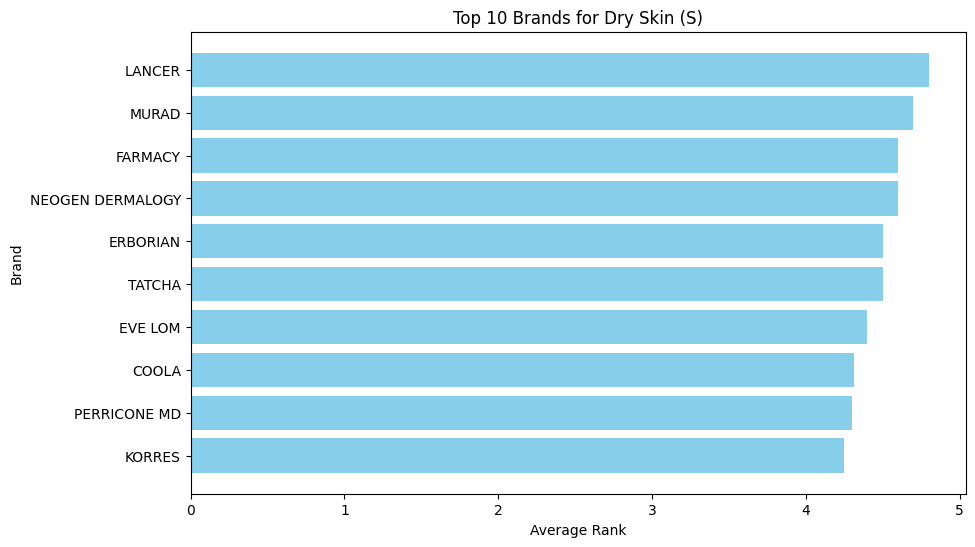

In [ ]:
# Filter data untuk hanya mencakup produk dengan Dry=1
filtered_df = df[df['Dry'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Dry Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

In [ ]:
# Filter data untuk hanya mencakup produk dengan Normal=1
filtered_df = df[df['Normal'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Normal")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Normal
Top 10 Brand Terbaik untuk Label 'M':
    Label                Brand      Rank
216     M   REN CLEAN SKINCARE  4.900000
193     M                GO-TO  4.800000
175     M                BELIF  4.625000
227     M  YOUTH TO THE PEOPLE  4.600000
217     M        SATURDAY SKIN  4.600000
221     M           SON & PARK  4.600000
208     M              LANEIGE  4.566667
176     M            BIOSSANCE  4.500000
198     M           JACK BLACK  4.500000
206     M               LANCER  4.500000

Top 10 Brand Terbaik untuk Label 'C':
   Label                      Brand  Rank
10     C                 CLARISONIC   5.0
18     C                ERNO LASZLO   5.0
8      C          CHARLOTTE TILBURY   4.9
25     C                      GO-TO   4.9
4      C                  BIOSSANCE   4.8
39     C                     NUFACE   4.7
32     C                     KORRES   4.6
0      C               AMOREPACIFIC   4.6
1      C               BAREMINERALS   4.6
14     C  DR. DENNIS GROSS SKINCARE   4

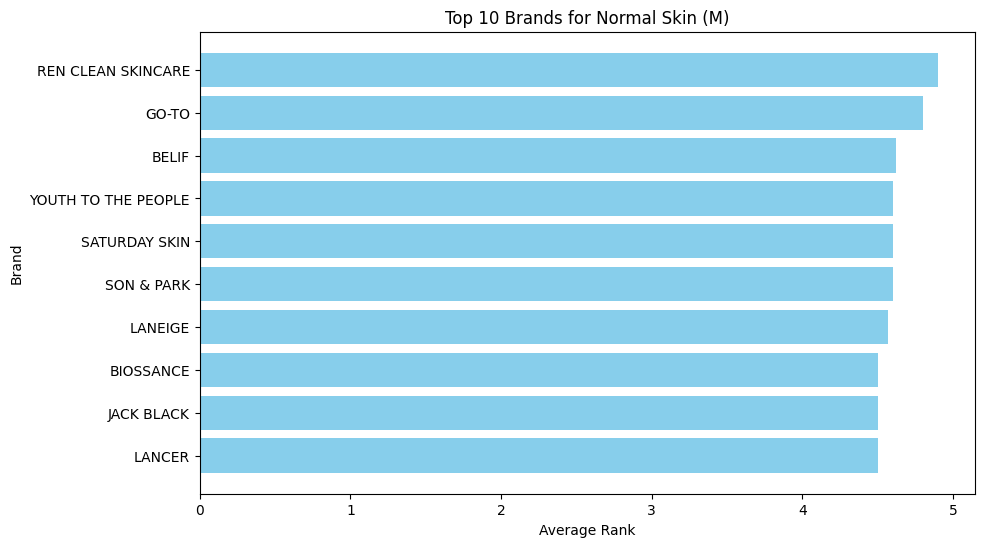

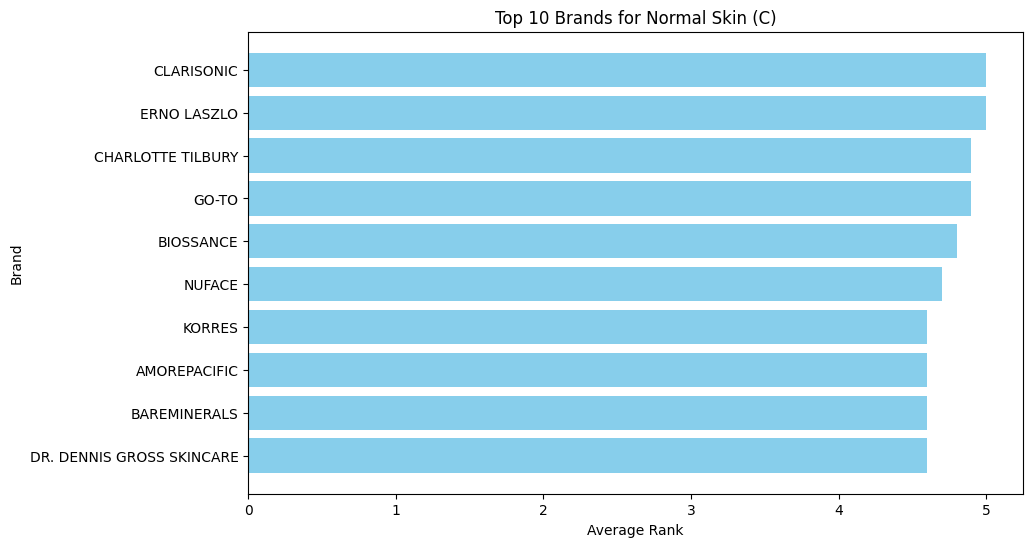

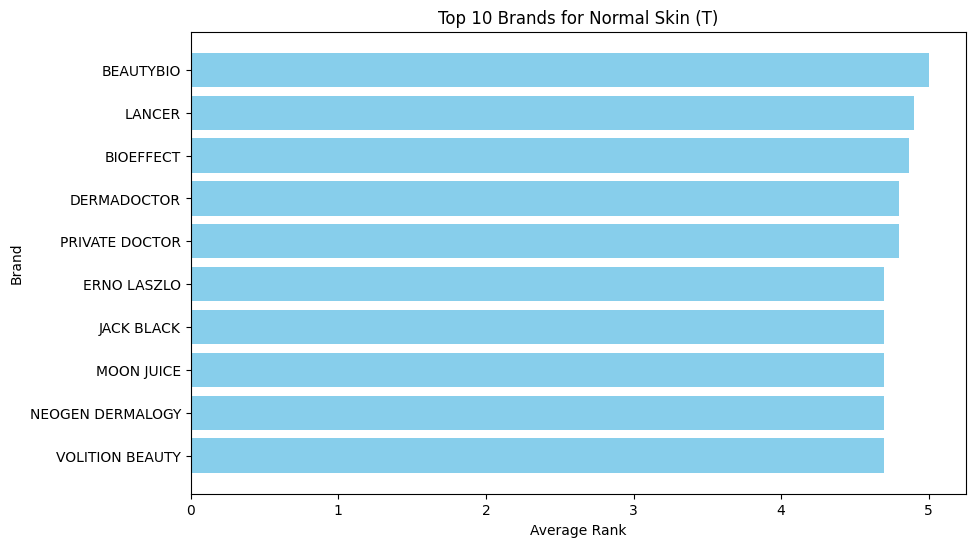

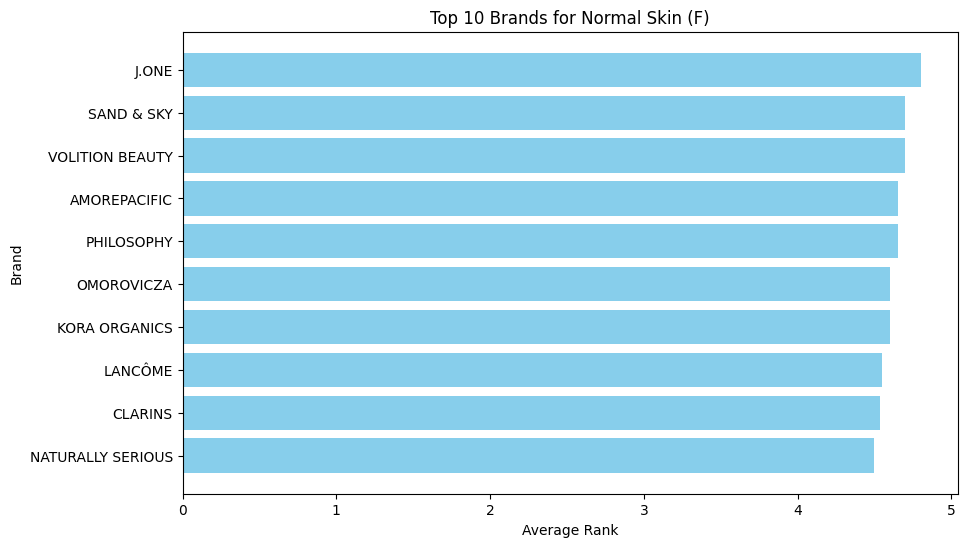

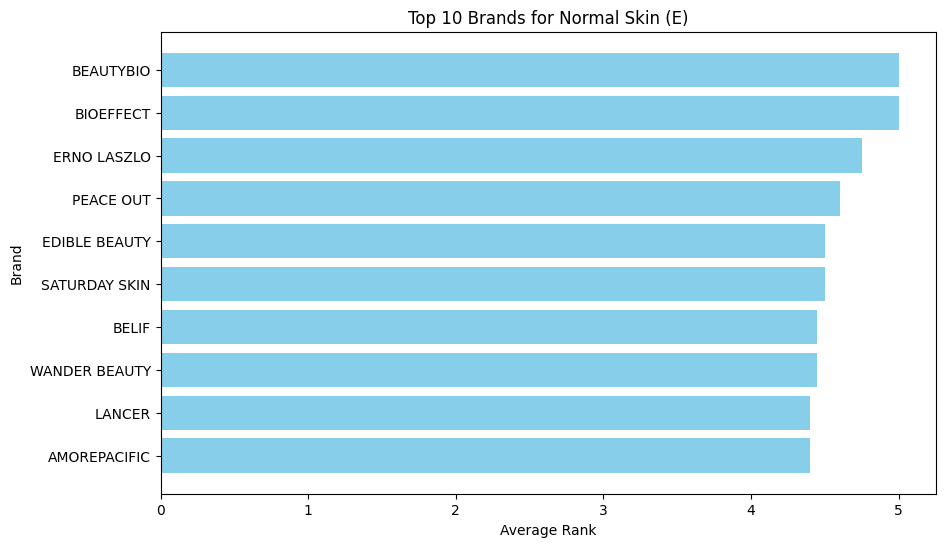

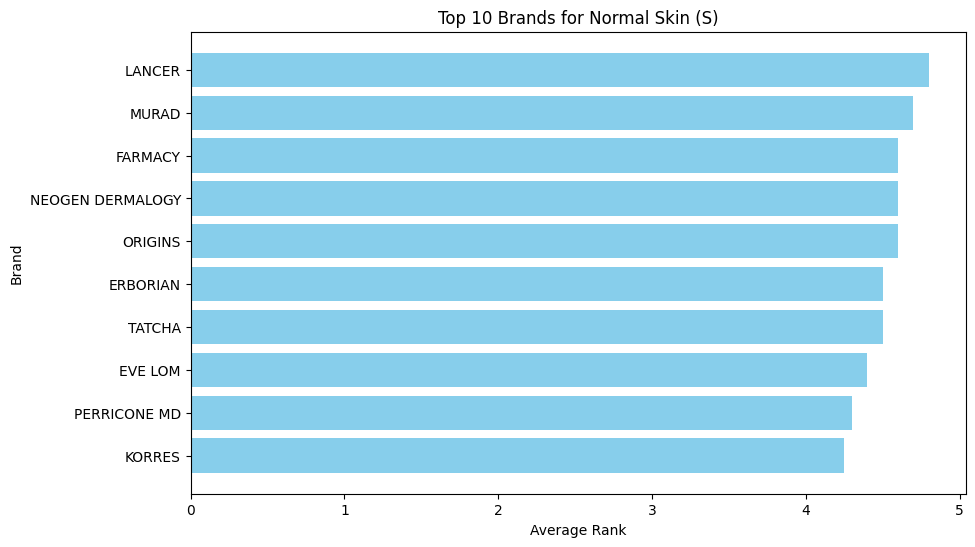

In [ ]:
# Filter data untuk hanya mencakup produk dengan Normal=1
filtered_df = df[df['Normal'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Normal Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

In [ ]:
# Filter data untuk hanya mencakup produk dengan Oily=1
filtered_df = df[df['Oily'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Berminyak")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Berminyak
Top 10 Brand Terbaik untuk Label 'M':
    Label                Brand  Rank
210     M   REN CLEAN SKINCARE  4.90
187     M                GO-TO  4.80
169     M                BELIF  4.60
211     M        SATURDAY SKIN  4.60
215     M           SON & PARK  4.60
192     M           JACK BLACK  4.50
200     M               LANCER  4.50
202     M              LANEIGE  4.50
221     M  YOUTH TO THE PEOPLE  4.50
170     M            BIOSSANCE  4.45

Top 10 Brand Terbaik untuk Label 'C':
   Label              Brand  Rank
10     C         CLARISONIC   5.0
18     C        ERNO LASZLO   5.0
8      C  CHARLOTTE TILBURY   4.9
25     C              GO-TO   4.9
4      C          BIOSSANCE   4.8
34     C             LANCER   4.7
39     C             NUFACE   4.7
32     C             KORRES   4.6
0      C       AMOREPACIFIC   4.6
1      C       BAREMINERALS   4.6

Top 10 Brand Terbaik untuk Label 'T':
    Label             Brand      Rank
262     T         BEAUTYBIO  5.000000
265     T  

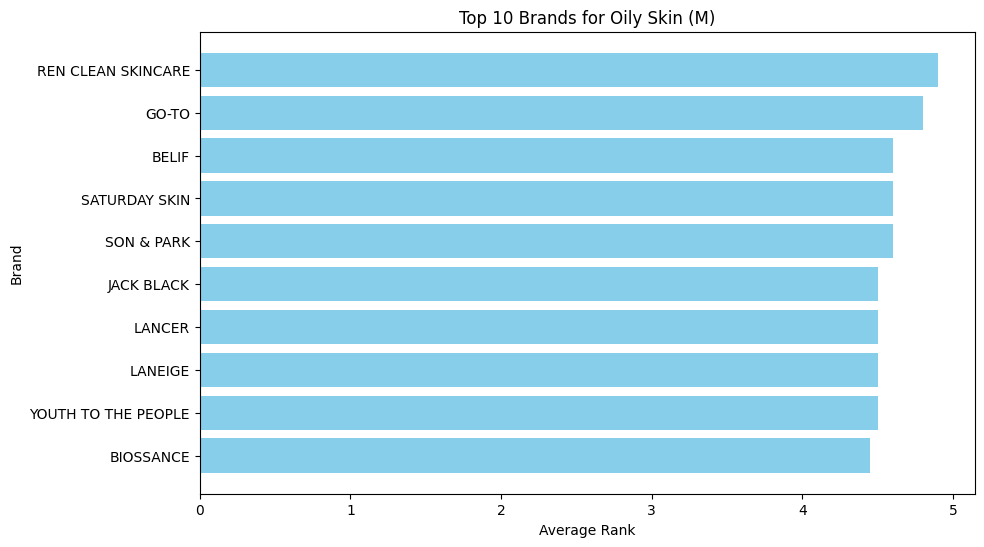

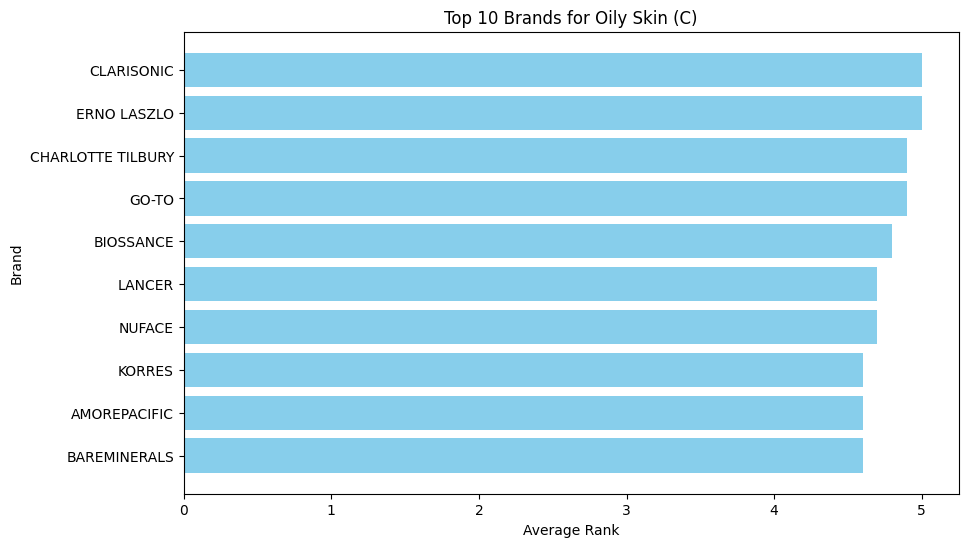

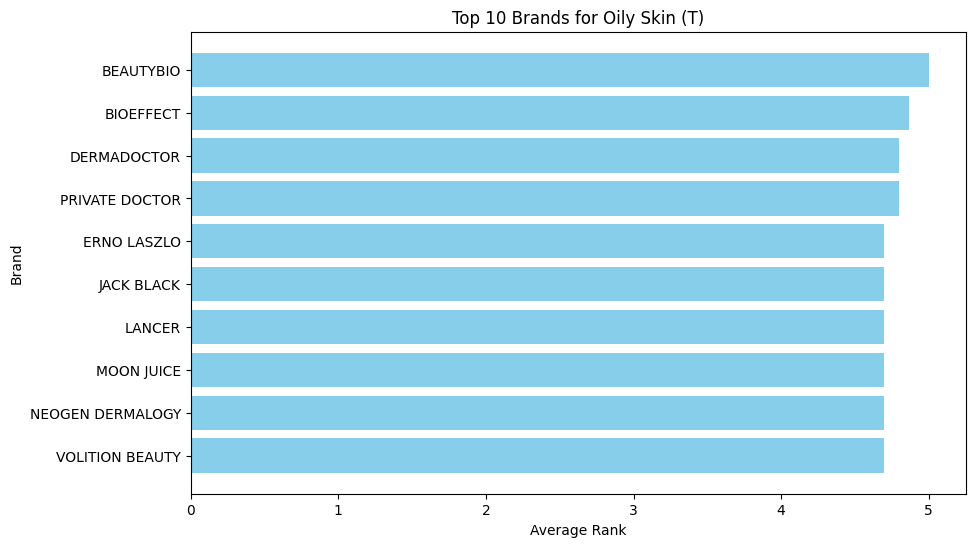

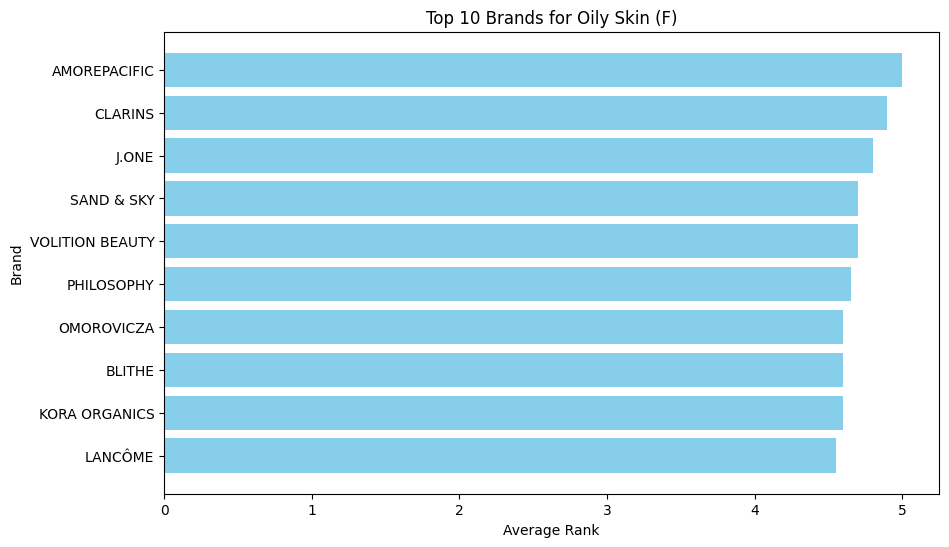

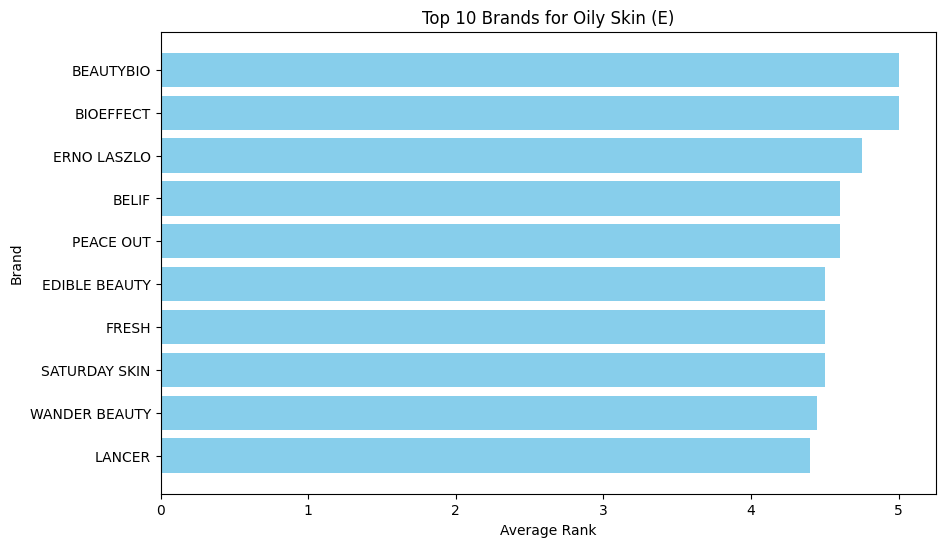

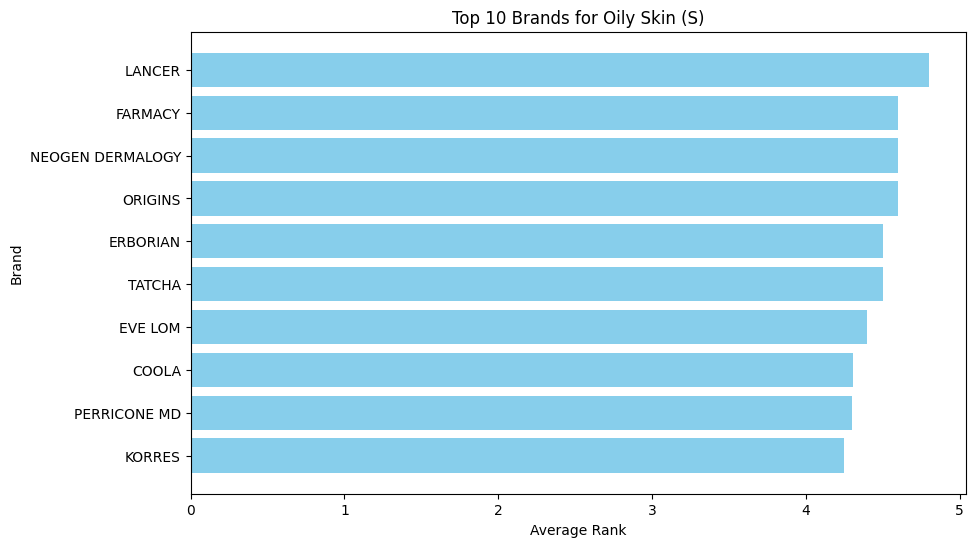

In [ ]:
# Filter data untuk hanya mencakup produk dengan Oily=1
filtered_df = df[df['Oily'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Oily Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

In [ ]:
# Filter data untuk hanya mencakup produk dengan Sensitive=1
filtered_df = df[df['Sensitive'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)
print("Kulit Sensitive")
# Menampilkan hasil
for i, label in enumerate(labels):
    print(f"Top 10 Brand Terbaik untuk Label '{label}':")
    print(results[i])
    print()

Kulit Sensitive
Top 10 Brand Terbaik untuk Label 'M':
    Label                Brand  Rank
195     M   REN CLEAN SKINCARE  4.90
172     M                GO-TO  4.80
158     M                BELIF  4.70
206     M  YOUTH TO THE PEOPLE  4.60
196     M        SATURDAY SKIN  4.60
200     M           SON & PARK  4.60
159     M            BIOSSANCE  4.50
177     M           JACK BLACK  4.50
185     M               LANCER  4.50
187     M              LANEIGE  4.48

Top 10 Brand Terbaik untuk Label 'C':
   Label                      Brand  Rank
8      C                 CLARISONIC   5.0
14     C                ERNO LASZLO   5.0
6      C          CHARLOTTE TILBURY   4.9
20     C                      GO-TO   4.9
0      C               AMOREPACIFIC   4.7
31     C                     NUFACE   4.7
25     C                     KORRES   4.6
10     C  DR. DENNIS GROSS SKINCARE   4.6
22     C               IT COSMETICS   4.6
44     C                      TARTE   4.6

Top 10 Brand Terbaik untuk Label 'T':

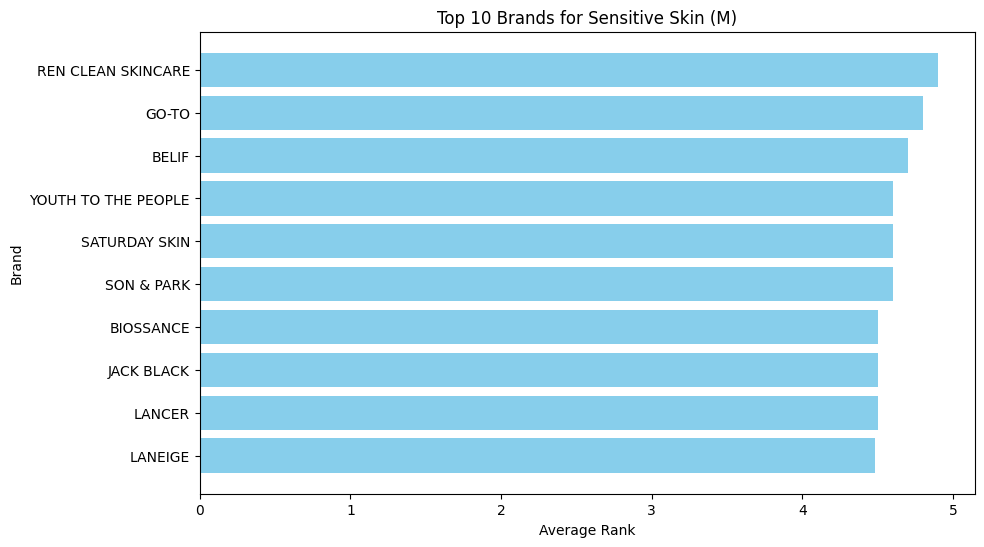

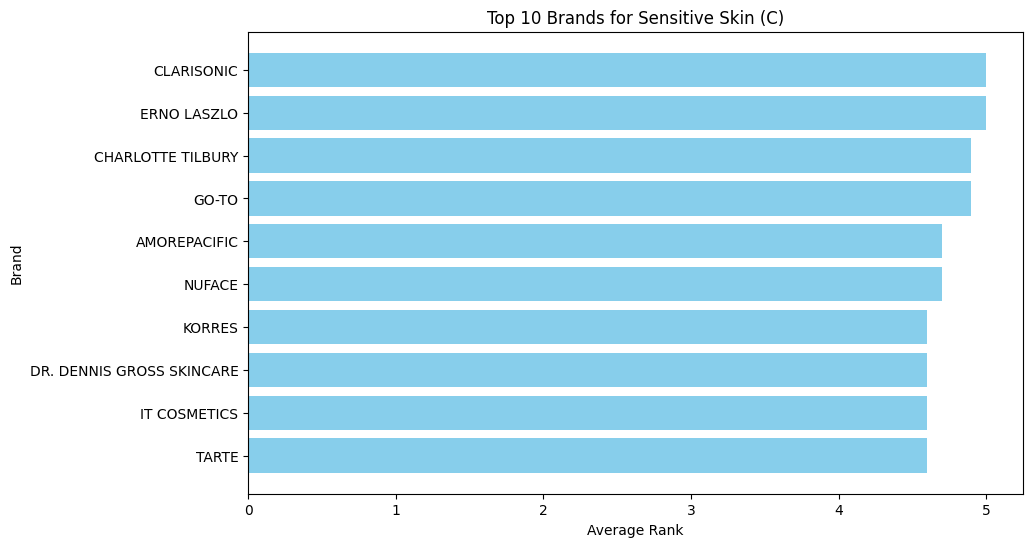

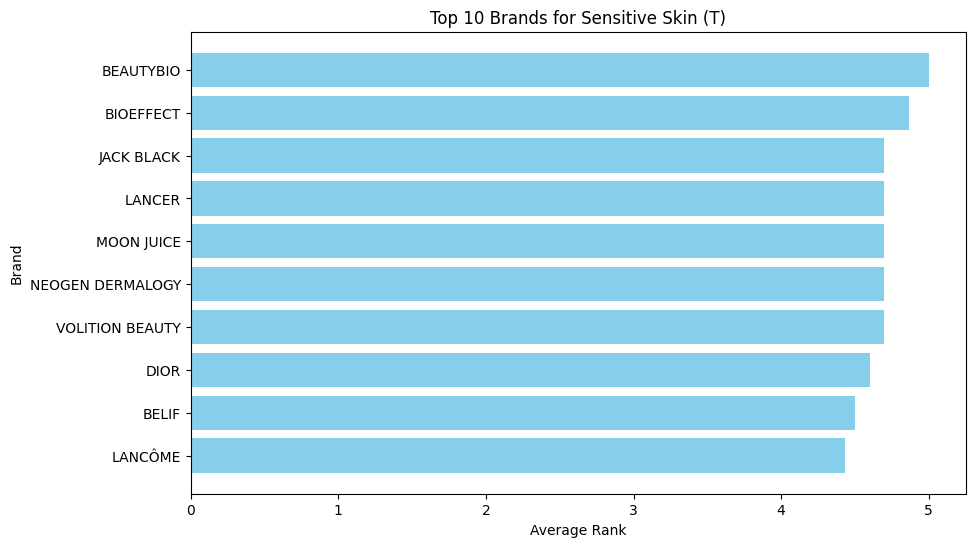

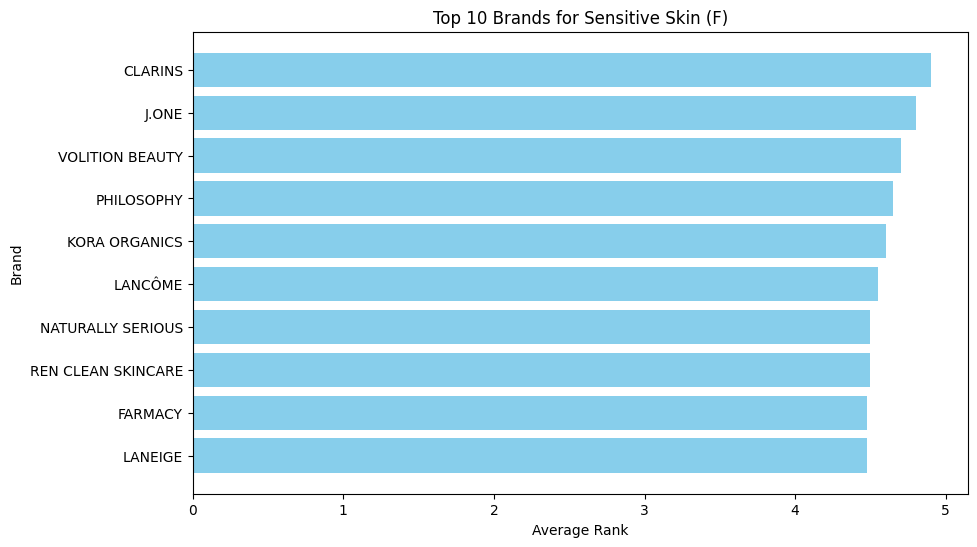

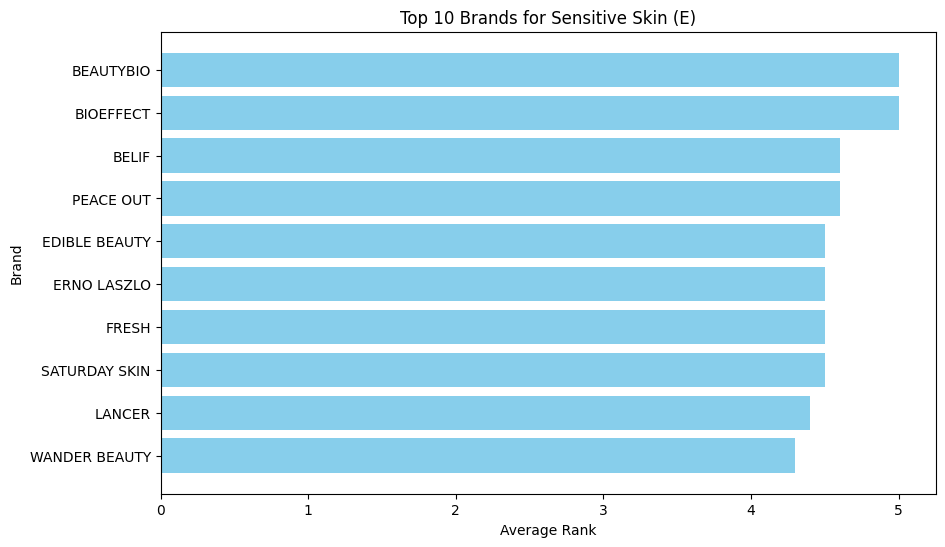

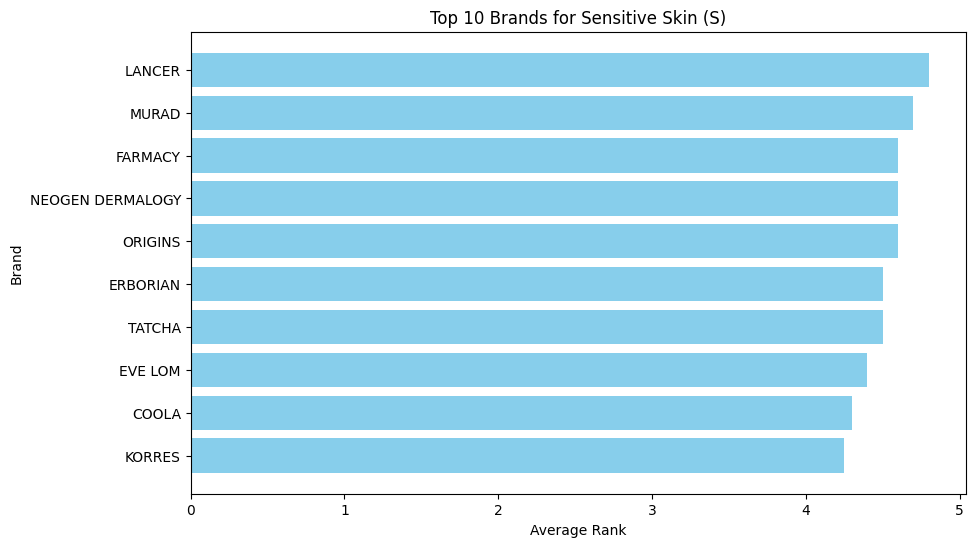

In [ ]:
# Filter data untuk hanya mencakup produk dengan Sensitive=1
filtered_df = df[df['Sensitive'] == 1]

# Kelompokkan data berdasarkan label dan brand, dan hitung rata-rata peringkat untuk setiap brand di setiap label
grouped_df = filtered_df.groupby(['Label', 'Brand']).agg({'Rank': 'mean'}).reset_index()

# Membuat fungsi untuk mendapatkan top 10 brand terbaik untuk setiap label
def get_top_10_brands_per_label(label):
    top_10_brands = grouped_df[grouped_df['Label'] == label].nlargest(10, 'Rank')
    return top_10_brands

# Membuat list untuk menyimpan hasil
results = []

# Looping untuk setiap label
labels = df['Label'].unique()
for label in labels:
    top_10_brands = get_top_10_brands_per_label(label)
    results.append(top_10_brands)

# Menampilkan hasil dalam bentuk bar graph
for i, label in enumerate(labels):
    top_10_brands = results[i]
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_brands['Brand'], top_10_brands['Rank'], color='skyblue')
    plt.xlabel('Average Rank')
    plt.ylabel('Brand')
    plt.title(f"Top 10 Brands for Sensitive Skin ({label})")
    plt.gca().invert_yaxis() # Membalikkan sumbu y agar bar dengan nilai tertinggi berada di atas
    plt.show()

6. Combination, Dry, Normal, Oily, Sensitive
* Berapa rata-rata skor kecocokan untuk kulit kombinasi, kering, normal, berminyak, dan sensitif?
* Berapa banyak produk yang cocok untuk kulit kombinasi, kering, normal, berminyak, dan sensitif?

In [ ]:
# Menghitung rata-rata skor kecocokan untuk setiap jenis kulit
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
average_match_scores = {}

for skin_type in skin_types:
    average_score = df[skin_type].mean()  # Menghitung rata-rata (persentase yang cocok)
    average_match_scores[skin_type] = average_score

# Menampilkan rata-rata skor kecocokan
print("Rata-rata skor kecocokan untuk setiap jenis kulit:")
for skin_type, avg_score in average_match_scores.items():
    print(f"Kulit {skin_type}: rata-rata skor kecocokan adalah {avg_score:.2f}")

Rata-rata skor kecocokan untuk setiap jenis kulit:
Kulit Combination: rata-rata skor kecocokan adalah 0.66
Kulit Dry: rata-rata skor kecocokan adalah 0.61
Kulit Normal: rata-rata skor kecocokan adalah 0.65
Kulit Oily: rata-rata skor kecocokan adalah 0.61
Kulit Sensitive: rata-rata skor kecocokan adalah 0.51


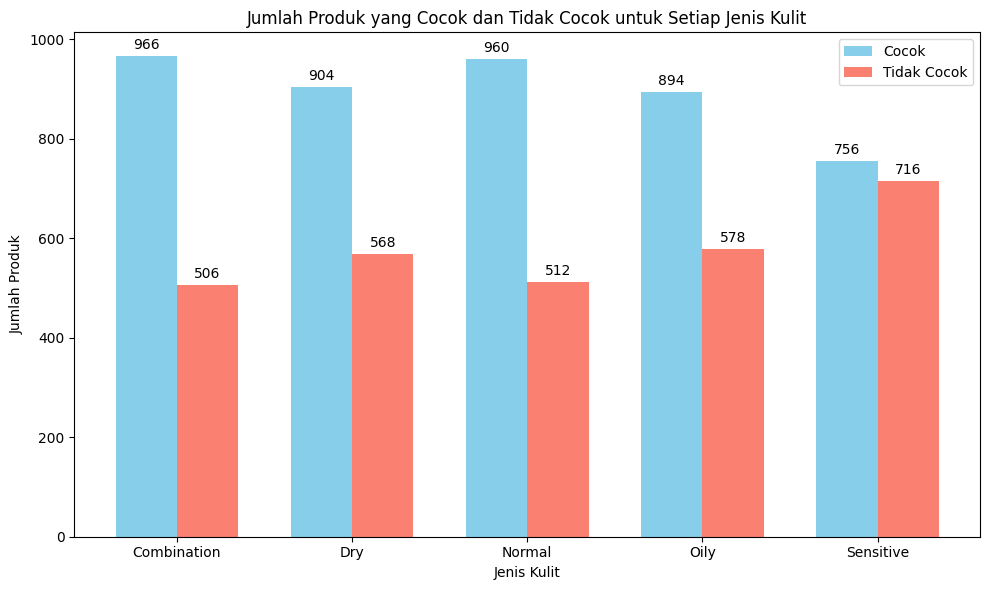

In [ ]:
# Menghitung jumlah produk yang cocok dan tidak cocok untuk setiap jenis kulit
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
products_count_cocok = {}
products_count_tidak_cocok = {}

for skin_type in skin_types:
    count_cocok = df[skin_type].sum()  # Menghitung jumlah produk yang cocok (nilai 1)
    count_tidak_cocok = df[skin_type].eq(0).sum()  # Menghitung jumlah produk yang tidak cocok (nilai 0)
    products_count_cocok[skin_type] = count_cocok
    products_count_tidak_cocok[skin_type] = count_tidak_cocok

# Menyiapkan data untuk plot
jenis_kulit = list(products_count_cocok.keys())
jumlah_cocok = [products_count_cocok[j] for j in jenis_kulit]
jumlah_tidak_cocok = [products_count_tidak_cocok[j] for j in jenis_kulit]

# Membuat bar plot menggunakan Matplotlib
x = np.arange(len(jenis_kulit))  # Jumlah jenis kulit
width = 0.35  # Lebar bar

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, jumlah_cocok, width, label='Cocok', color='skyblue')
bars2 = ax.bar(x + width/2, jumlah_tidak_cocok, width, label='Tidak Cocok', color='salmon')

# Menambahkan label, judul, dan legend
ax.set_xlabel('Jenis Kulit')
ax.set_ylabel('Jumlah Produk')
ax.set_title('Jumlah Produk yang Cocok dan Tidak Cocok untuk Setiap Jenis Kulit')
ax.set_xticks(x)
ax.set_xticklabels(jenis_kulit)
ax.legend()

# Menambahkan nilai di atas bar
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

Analisis Bivariat
1. Price vs. Rank
* Apakah ada korelasi antara harga produk dan peringkatnya?
* Apakah produk dengan harga lebih tinggi cenderung mendapatkan peringkat yang lebih baik?

In [ ]:
# Memastikan tipe data harga adalah numerik
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Menghilangkan baris dengan nilai harga yang hilang (NaN)
df = df.dropna(subset=['Price', 'Rank'])

# Menghitung koefisien korelasi antara Price dan Rank
correlation = df['Price'].corr(df['Rank'])

print(f"Koefisien Korelasi Pearson antara Price dan Rank: {correlation:.2f}")

Koefisien Korelasi Pearson antara Price dan Rank: -0.03


Nilai yang mendekati 1 atau -1 menunjukkan adanya korelasi, sedangkan nilai mendekati 0 menunjukkan tidak adanya korelasi.

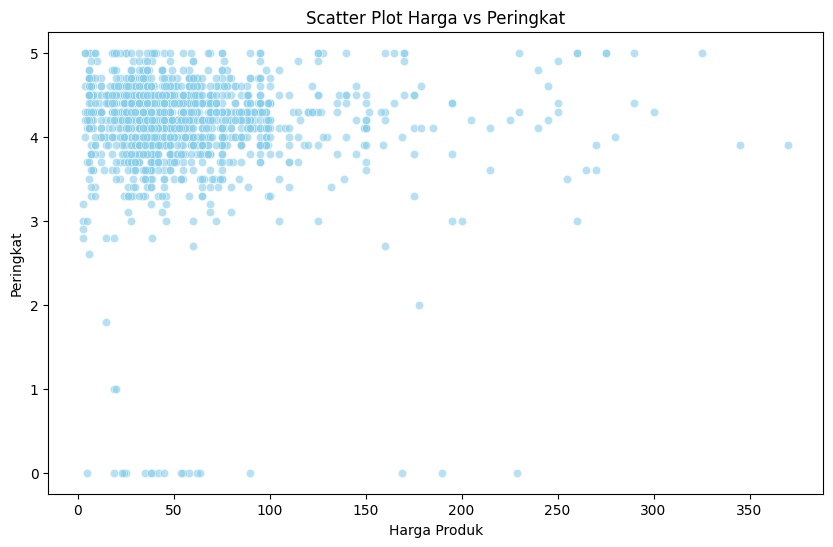

In [ ]:
# Scatter plot Price vs Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rank', data=df, color='skyblue', alpha=0.6)
plt.title('Scatter Plot Harga vs Peringkat')
plt.xlabel('Harga Produk')
plt.ylabel('Peringkat')
plt.show()

Gambar ini menampilkan grafik sebar (scatter plot) dengan judul “Scatter Plot Harga vs Peringkat”. Sumbu horizontal diberi label “Harga Produk” yang berkisar dari 0 hingga 350, dan sumbu vertikal diberi label “Peringkat” yang berkisar dari 1 hingga 5. Grafik ini diisi dengan banyak titik berwarna biru muda yang tampak lebih terkonsentrasi pada harga produk yang lebih rendah dan peringkat yang lebih tinggi. Tidak ada pola khusus atau kelompok yang dapat dengan mudah dikenali dari distribusi titik ini. Gambar ini menarik karena tampaknya menggambarkan beberapa bentuk analisis data, mungkin menunjukkan hubungan antara harga produk dan peringkatnya.

Jika terlihat pola naik yang kuat dalam scatter plot, Anda dapat menyimpulkan bahwa produk dengan harga lebih tinggi cenderung mendapatkan peringkat yang lebih baik.

2. Brand vs. Rank
* Bagaimana peringkat rata-rata dari berbagai merek kosmetik?√
* Apakah ada merek yang secara konsisten mendapatkan peringkat lebih tinggi?

In [ ]:
# Menghitung peringkat rata-rata untuk setiap merek
average_rank_by_brand = df.groupby('Brand')['Rank'].mean().sort_values(ascending=False)

# Menampilkan hasil peringkat rata-rata
print("Peringkat rata-rata dari berbagai merek kosmetik:")
print(average_rank_by_brand)

Peringkat rata-rata dari berbagai merek kosmetik:
Brand
NURSE JAMIE                      5.0000
CLARISONIC                       5.0000
BIOEFFECT                        4.9000
GO-TO                            4.8500
PRIVATE DOCTOR                   4.8000
                                  ...  
YVES SAINT LAURENT               3.4000
EVE LOM                          3.3625
FOREO                            3.2375
ST. TROPEZ TANNING ESSENTIALS    2.4000
DERMAFLASH                       0.0000
Name: Rank, Length: 116, dtype: float64


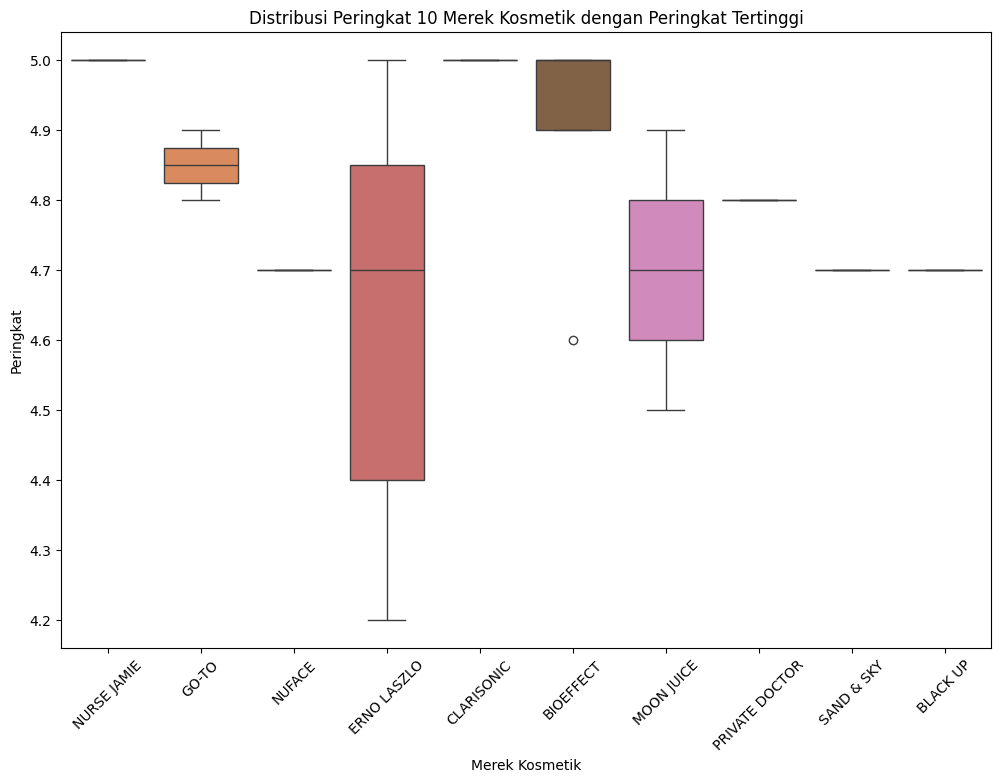

In [ ]:
# Menghitung peringkat rata-rata untuk setiap merek
average_rank_by_brand = df.groupby('Brand')['Rank'].mean().sort_values(ascending=False)

# Memilih 10 merek dengan peringkat rata-rata tertinggi
top_10_brands = average_rank_by_brand.head(10).index

# Filter data hanya untuk 10 merek teratas
df_top_brands = df[df['Brand'].isin(top_10_brands)]

# Visualisasi boxplot untuk melihat distribusi peringkat 10 merek teratas
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Rank', data=df_top_brands, palette='muted', hue='Brand', legend=False)
plt.title('Distribusi Peringkat 10 Merek Kosmetik dengan Peringkat Tertinggi')
plt.xlabel('Merek Kosmetik')
plt.ylabel('Peringkat')
plt.xticks(rotation=45)
plt.show()

3. Label vs. Price
* Apakah ada perbedaan harga rata-rata berdasarkan kategori produk kosmetik?

Rata-rata harga berdasarkan kategori produk kosmetik:
Label
T    79.177419
M    69.087248
E    63.602871
S    45.905882
F    42.624060
C    32.601423
Name: Price, dtype: float64


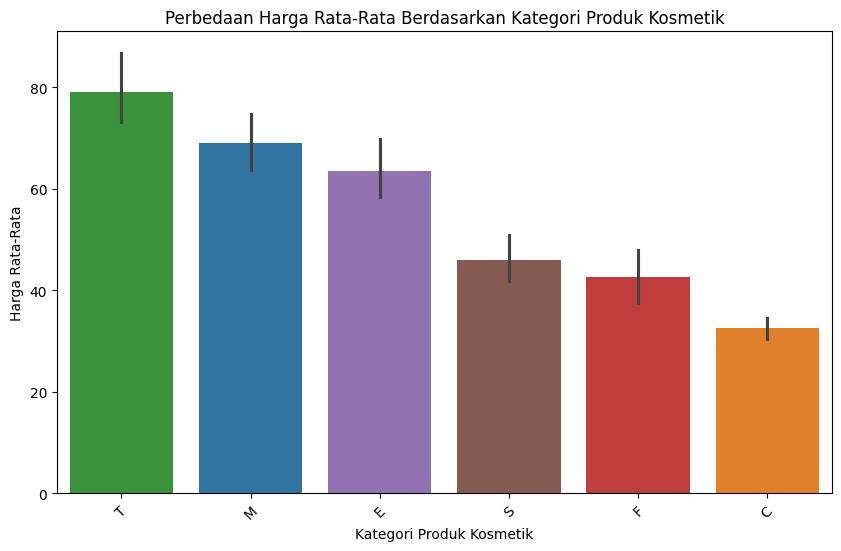

In [ ]:
# Menghitung rata-rata harga untuk setiap kategori produk kosmetik
average_price_by_label = df.groupby('Label')['Price'].mean().sort_values(ascending=False)

# Menampilkan rata-rata harga berdasarkan kategori produk kosmetik
print("Rata-rata harga berdasarkan kategori produk kosmetik:")
print(average_price_by_label)

# Visualisasi barplot untuk perbedaan harga rata-rata berdasarkan kategori produk kosmetik
plt.figure(figsize=(10, 6))
sns.barplot(x='Label', y='Price', data=df, order=average_price_by_label.index, hue='Label', legend=False)
plt.title('Perbedaan Harga Rata-Rata Berdasarkan Kategori Produk Kosmetik')
plt.xlabel('Kategori Produk Kosmetik')
plt.ylabel('Harga Rata-Rata')
plt.xticks(rotation=45)
plt.show()

4. Combination vs. Rank, Dry vs. Rank, Normal vs. Rank, Oily vs. Rank, Sensitive vs. Rank
* Bagaimana hubungan antara skor kecocokan untuk berbagai jenis kulit dengan peringkat produk?√

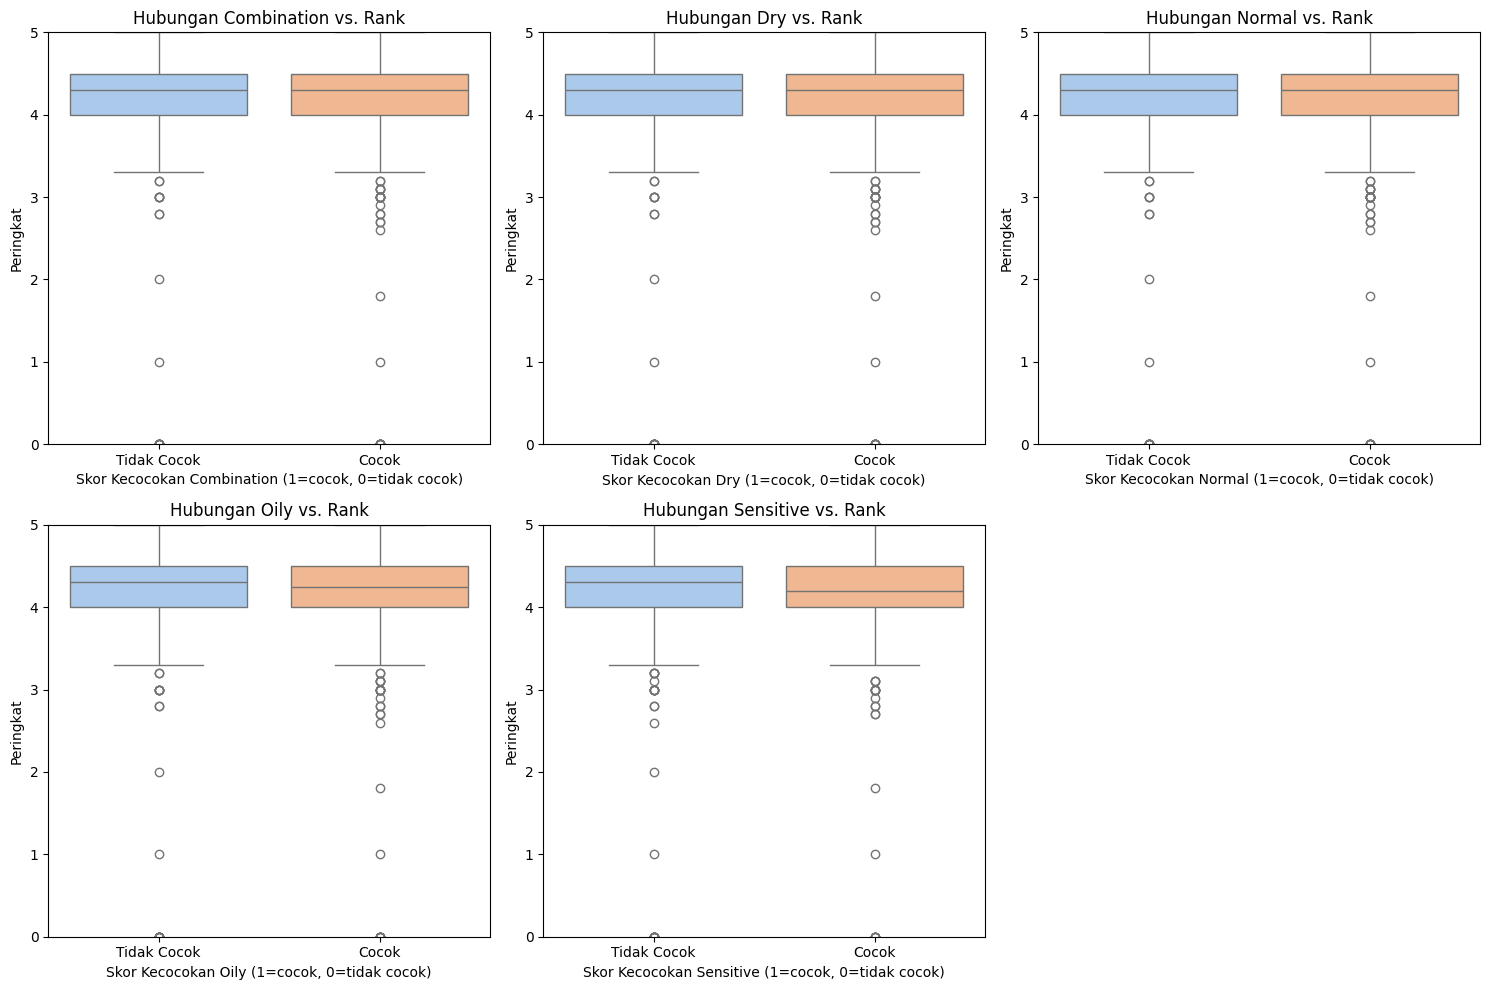

In [ ]:
# List jenis kulit yang akan dianalisis
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

# Visualisasi boxplot untuk melihat hubungan skor kecocokan dengan peringkat untuk setiap jenis kulit
plt.figure(figsize=(15, 10))

for i, skin_type in enumerate(skin_types, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[skin_type], y='Rank', data=df, hue=skin_type, palette='pastel', legend=False)
    plt.title(f'Hubungan {skin_type} vs. Rank')
    plt.xlabel(f'Skor Kecocokan {skin_type} (1=cocok, 0=tidak cocok)')
    plt.ylabel('Peringkat')
    plt.ylim(0, 5)  # Menetapkan batas sumbu y dari 0 sampai 5 untuk konsistensi
    plt.xticks([0, 1], ['Tidak Cocok', 'Cocok'])  # Menetapkan label sumbu x

plt.tight_layout()
plt.show()

Gambar ini menampilkan enam diagram kotak (box plot) yang disusun dalam dua baris dan tiga kolom. Setiap diagram kotak mewakili perbandingan statistik antara dua kategori yang diberi label “Tidak Cocok” dan “Cocok” pada sumbu x. Sumbu y diberi label “Peringkat,” menunjukkan bahwa titik data diberi peringkat dalam beberapa cara.

Setiap diagram kotak memiliki judul yang menunjukkan jenis hubungan yang diwakilinya:

Baris pertama mencakup: “Hubungan Combination vs. Rank,” “Hubungan Dry vs. Rank,” dan “Hubungan Normal vs. Rank.”
Baris kedua mencakup: “Hubungan Oily vs. Rank,” “Hubungan Sensitive vs. Rank,” dan “Hubungan Rosacea Kombinasi T-Zone & Pipi Cocok.”
Judul-judul ini menunjukkan bahwa diagram kotak menampilkan hubungan antara berbagai jenis kulit atau kondisi (kombinasi, kering, normal, berminyak, sensitif, rosacea kombinasi T-zone & pipi) dengan peringkat kesesuaian masing-masing.

Relevansi atau ketertarikan dari gambar ini terletak pada penggunaannya untuk analisis statistik atau presentasi data yang membandingkan seberapa cocok kondisi tertentu dengan sistem peringkat.

Analisa Multivariat
1. Price, Rank, and Brand
* Distribusi Harga dan Peringkat Produk di Antara Berbagai Merek
* Merek yang Memiliki Harga Tinggi Tetapi Peringkat Rendah, atau Sebaliknya

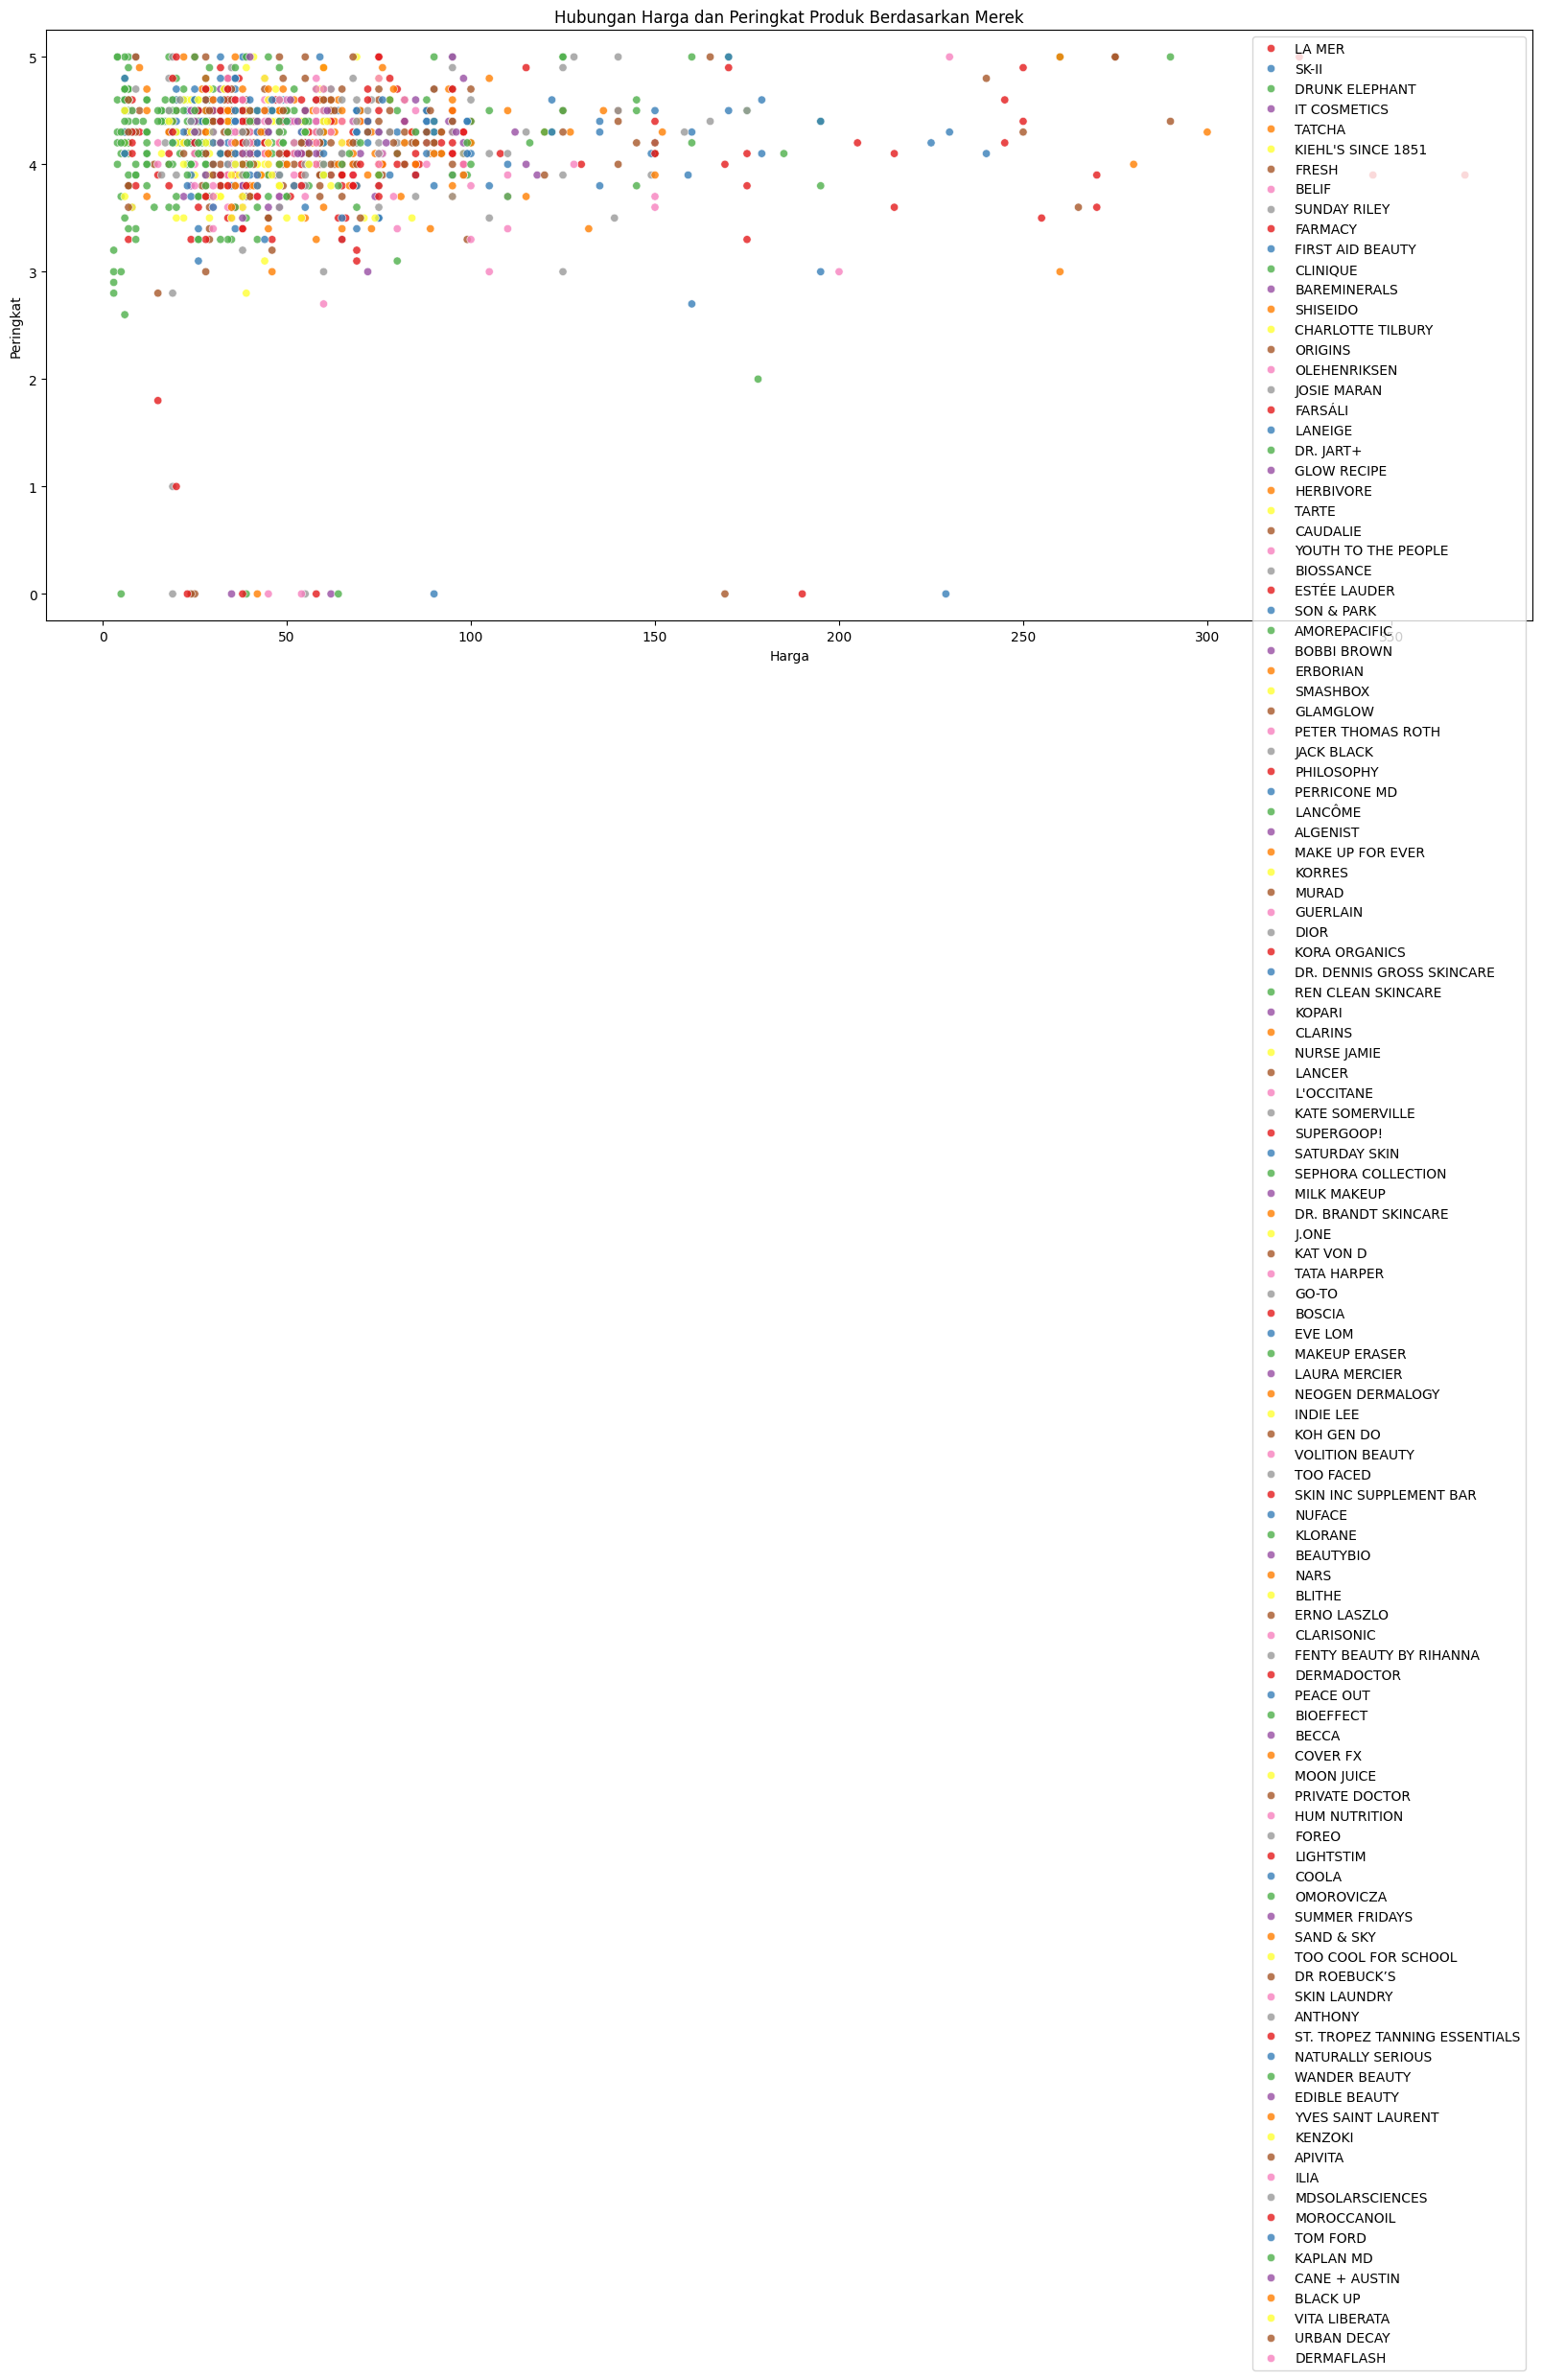

In [ ]:
# Visualisasi scatter plot untuk melihat hubungan antara harga dan peringkat produk berdasarkan merek
plt.figure(figsize=(20, 8))
sns.scatterplot(x='Price', y='Rank', hue='Brand', data=df, palette='Set1', alpha=0.8)
plt.title('Hubungan Harga dan Peringkat Produk Berdasarkan Merek')
plt.xlabel('Harga')
plt.ylabel('Peringkat')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Melihat ringkasan statistik deskriptif untuk harga dan peringkat berdasarkan merek
summary = df.groupby('Brand').agg({'Price': ['mean', 'std', 'min', 'max'],
                                   'Rank': ['mean', 'std', 'min', 'max', 'count']})
print(summary)

                          Price                              Rank            \
                           mean        std   min    max      mean       std   
Brand                                                                         
ALGENIST              70.777778  28.114236  25.0  118.0  3.992593  0.885319   
AMOREPACIFIC         103.523810  63.811142  32.0  260.0  4.238095  0.398091   
ANTHONY               32.000000   7.211103  24.0   38.0  4.233333  0.208167   
APIVITA               30.000000        NaN  30.0   30.0  4.000000       NaN   
BAREMINERALS          35.833333  11.461530  27.0   58.0  4.116667  0.386868   
...                         ...        ...   ...    ...       ...       ...   
VITA LIBERATA         49.500000   6.363961  45.0   54.0  3.850000  0.494975   
VOLITION BEAUTY       49.400000  12.401613  35.0   62.0  4.420000  0.356371   
WANDER BEAUTY         25.000000   0.000000  25.0   25.0  4.450000  0.212132   
YOUTH TO THE PEOPLE   46.714286  10.242303  35.0   6

In [ ]:
# Mencari merek dengan karakteristik harga tinggi tetapi peringkat rendah, atau sebaliknya
high_price_low_rank = df[df['Price'] > df['Price'].mean() + df['Price'].std()]
low_price_high_rank = df[df['Rank'] > df['Rank'].mean() + df['Rank'].std()]

print("Merek dengan harga tinggi tetapi peringkat rendah:")
print(high_price_low_rank['Brand'].unique())

print("\nMerek dengan harga rendah tetapi peringkat tinggi:")
print(low_price_high_rank['Brand'].unique())

Merek dengan harga tinggi tetapi peringkat rendah:
['LA MER' 'SK-II' 'SUNDAY RILEY' 'TATCHA' 'AMOREPACIFIC' 'FRESH'
 'PERRICONE MD' 'LANCÔME' 'ALGENIST' 'SHISEIDO' 'DIOR' 'LANCER'
 "L'OCCITANE" 'CAUDALIE' 'ESTÉE LAUDER' 'TATA HARPER' 'CLARINS'
 'OLEHENRIKSEN' 'BIOEFFECT' 'GUERLAIN' 'FOREO' 'LIGHTSTIM'
 'PETER THOMAS ROTH' 'DR. BRANDT SKINCARE' 'OMOROVICZA' 'GLAMGLOW'
 'EVE LOM' 'DR. DENNIS GROSS SKINCARE' 'KATE SOMERVILLE']

Merek dengan harga rendah tetapi peringkat tinggi:
['LA MER' 'YOUTH TO THE PEOPLE' 'FRESH' 'REN CLEAN SKINCARE' 'NURSE JAMIE'
 'CLINIQUE' 'SHISEIDO' 'DIOR' 'ESTÉE LAUDER' 'LANEIGE' 'GO-TO' 'BIOSSANCE'
 "KIEHL'S SINCE 1851" 'JACK BLACK' 'KORRES' 'LANCÔME' 'CHARLOTTE TILBURY'
 'SEPHORA COLLECTION' 'PHILOSOPHY' 'ERNO LASZLO' 'CLARISONIC' 'BIOEFFECT'
 'MOON JUICE' 'PRIVATE DOCTOR' 'ALGENIST' 'LANCER' 'MURAD'
 'DR. DENNIS GROSS SKINCARE' 'BEAUTYBIO' 'DERMADOCTOR' 'OMOROVICZA'
 'PETER THOMAS ROTH' 'DR. JART+' 'ORIGINS' 'FOREO' 'J.ONE' 'CLARINS'
 'GLAMGLOW' 'AMOREPACIFIC'

2. Label, Price, and Rank
* Bagaimana harga dan peringkat bervariasi di antara berbagai kategori produk?
* Apakah ada kategori produk yang cenderung memiliki harga tinggi dan peringkat tinggi?

In [ ]:
# Melihat ringkasan statistik deskriptif untuk harga dan peringkat berdasarkan label (kategori produk)
summary = df.groupby('Label').agg({'Price': ['mean', 'std', 'min', 'max'],
                                   'Rank': ['mean', 'std', 'min', 'max', 'count']})
print(summary)

           Price                              Rank                          
            mean        std   min    max      mean       std  min  max count
Label                                                                       
C      32.601423  18.139672   4.0   95.0  4.312456  0.646989  0.0  5.0   281
E      63.602871  42.063142   5.0  260.0  3.806220  0.694075  0.0  5.0   209
F      42.624060  40.857618   3.0  250.0  4.166917  0.712341  0.0  5.0   266
M      69.087248  50.839145   4.0  325.0  4.238591  0.509262  0.0  5.0   298
S      45.905882  30.809252  18.0  260.0  4.051176  0.646725  0.0  5.0   170
T      79.177419  54.559784  18.0  370.0  4.218145  0.468473  0.0  5.0   248


In [ ]:
# Mencari kategori produk dengan harga tinggi dan peringkat tinggi
high_price_high_rank = df[(df['Price'] > df['Price'].mean() + df['Price'].std()) &
                          (df['Rank'] > df['Rank'].mean() + df['Rank'].std())]

print("Label produk dengan harga tinggi dan peringkat tinggi:")
print(high_price_high_rank['Label'].unique())

Label produk dengan harga tinggi dan peringkat tinggi:
['M' 'T' 'F' 'E' 'S']


5.	Price, Rank, and Skin Type Scores (Combination, Dry, Normal, Oily, Sensitive)
*	Bagaimana harga dan peringkat produk bervariasi berdasarkan skor kecocokan untuk berbagai jenis kulit?
*	Apakah ada hubungan antara harga, peringkat, dan kecocokan untuk kulit tertentu?

In [ ]:
# a. Analisis Deskriptif: Variasi harga dan peringkat produk berdasarkan skor kecocokan jenis kulit
skin_type_scores = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

for skin_type in skin_type_scores:
    print(f"\nStatistik untuk jenis kulit: {skin_type}")
    # Filter data untuk jenis kulit tertentu
    skin_type_df = df[df[skin_type] == 1]

    # Statistik deskriptif untuk Price dan Rank
    price_stats = skin_type_df['Price'].describe()
    rank_stats = skin_type_df['Rank'].describe()

    print(f"Statistik Harga:\n{price_stats}")
    print(f"\nStatistik Peringkat:\n{rank_stats}")


Statistik untuk jenis kulit: Combination
Statistik Harga:
count    966.000000
mean      55.993789
std       44.802202
min        3.000000
25%       30.000000
50%       42.000000
75%       68.000000
max      345.000000
Name: Price, dtype: float64

Statistik Peringkat:
count    966.000000
mean       4.170186
std        0.585791
min        0.000000
25%        4.000000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rank, dtype: float64

Statistik untuk jenis kulit: Dry
Statistik Harga:
count    904.000000
mean      57.921460
std       46.575311
min        3.000000
25%       30.000000
50%       45.000000
75%       69.000000
max      345.000000
Name: Price, dtype: float64

Statistik Peringkat:
count    904.000000
mean       4.166814
std        0.599469
min        0.000000
25%        4.000000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rank, dtype: float64

Statistik untuk jenis kulit: Normal
Statistik Harga:
count    960.000000
mean      57.202083
st

Berikut adalah statistik lebih rinci untuk harga dan peringkat produk kosmetik berdasarkan jenis kulit:

1. **Statistik Harga (Oily)**:
   - Jumlah data: 894
   - Rata-rata harga: $55.73
   - Standar deviasi harga: $45.08
   - Harga minimum: $3.00
   - Harga maksimum: $345.00

2. **Statistik Peringkat (Oily)**:
   - Jumlah data: 894
   - Rata-rata peringkat: 4.16
   - Standar deviasi peringkat: 0.58
   - Peringkat minimum: 0.0
   - Peringkat maksimum: 5.0

3. **Statistik Harga (Sensitive)**:
   - Jumlah data: 756
   - Rata-rata harga: $55.92
   - Standar deviasi harga: $46.92
   - Harga minimum: $3.00
   - Harga maksimum: $345.00

4. **Statistik Peringkat (Sensitive)**:
   - Jumlah data: 756
   - Rata-rata peringkat: 4.16
   - Standar deviasi peringkat: 0.56
   - Peringkat minimum: 0.0
   - Peringkat maksimum: 5.0


In [ ]:
# Menghitung skor kecocokan sebagai jumlah dari kolom Combination, Dry, Normal, Oily, dan Sensitive
df['Skin Type Score'] = df[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']].sum(axis=1)

# b. Analisis Korelasi: Hubungan antara harga, peringkat, dan skor kecocokan untuk kulit tertentu
skin_type_scores = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

for skin_type in skin_type_scores:
    # Filter data untuk jenis kulit tertentu
    skin_type_df = df[df[skin_type] == 1]

    # Menghitung korelasi antara Price, Rank, dan Skin Type Score
    correlation_price = skin_type_df[['Price', 'Skin Type Score']].corr().loc['Price', 'Skin Type Score']
    correlation_rank = skin_type_df[['Rank', 'Skin Type Score']].corr().loc['Rank', 'Skin Type Score']

    print(f"\nJenis Kulit: {skin_type}")
    print(f"Korelasi antara Price dan Skin Type Score: {correlation_price}")
    print(f"Korelasi antara Rank dan Skin Type Score: {correlation_rank}")


Jenis Kulit: Combination
Korelasi antara Price dan Skin Type Score: 0.041695547450096626
Korelasi antara Rank dan Skin Type Score: -0.037228040794412255

Jenis Kulit: Dry
Korelasi antara Price dan Skin Type Score: -0.07059976715382614
Korelasi antara Rank dan Skin Type Score: -0.03542891489623435

Jenis Kulit: Normal
Korelasi antara Price dan Skin Type Score: -0.0431701682153748
Korelasi antara Rank dan Skin Type Score: -0.08632163323774084

Jenis Kulit: Oily
Korelasi antara Price dan Skin Type Score: 0.06134248589876491
Korelasi antara Rank dan Skin Type Score: -0.033352194390222814

Jenis Kulit: Sensitive
Korelasi antara Price dan Skin Type Score: 0.025882187851566672
Korelasi antara Rank dan Skin Type Score: -0.03913265626564472


Korelasi adalah ukuran statistik yang menggambarkan sejauh mana dua variabel bergerak bersamaan. Nilai korelasi berkisar antara -1 hingga 1:

Jika nilai korelasi mendekati 1, maka ada hubungan positif yang kuat antara kedua variabel (ketika satu naik, yang lain juga naik).
Jika nilai korelasi mendekati -1, maka ada hubungan negatif yang kuat antara kedua variabel (ketika satu naik, yang lain turun).
Jika nilai korelasi mendekati 0, maka tidak ada hubungan linier yang kuat antara kedua variabel.
Dalam konteks data harga dan peringkat produk kosmetik, korelasi dapat membantu kita memahami apakah ada hubungan antara harga produk dan peringkatnya. Semakin dekat nilai korelasi dengan 1 atau -1, semakin kuat hubungannya. Namun, ingat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat, hanya hubungan statistik antara dua variabel.

#Modeling Machine learning harga rumah

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
label_encoder = LabelEncoder()

# Mengubah kolom kategori menjadi numerik
df['Label'] = label_encoder.fit_transform(df['Label'])
df['Brand'] = label_encoder.fit_transform(df['Brand'])
df['Name'] = label_encoder.fit_transform(df['Name'])

In [ ]:
# Memastikan semua kolom lain adalah numerik
print(df.dtypes)

# Memeriksa apakah ada nilai NaN
print(df.isnull().sum())

# Jika ada nilai NaN, kita bisa mengisi atau menghapusnya, berikut contoh mengisi nilai NaN dengan nilai rata-rata
# df = df.fillna(df.mean())

Label                int64
Brand                int64
Name                 int64
Price              float64
Rank               float64
Combination          int64
Dry                  int64
Normal               int64
Oily                 int64
Sensitive            int64
Skin Type Score      int64
dtype: object
Label              0
Brand              0
Name               0
Price              0
Rank               0
Combination        0
Dry                0
Normal             0
Oily               0
Sensitive          0
Skin Type Score    0
dtype: int64


In [ ]:
# Memisahkan fitur dan label
X = df.drop('Label', axis=1)
y = df['Label']

In [ ]:
# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 1. Model Logistic Regression (untuk klasifikasi)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.41      0.65      0.50        65
           1       0.38      0.16      0.23        49
           2       0.15      0.15      0.15        55
           3       0.28      0.38      0.32        55
           4       0.17      0.08      0.11        24
           5       0.42      0.28      0.33        47

    accuracy                           0.32       295
   macro avg       0.30      0.28      0.27       295
weighted avg       0.31      0.32      0.30       295

Accuracy: 0.31864406779661014


In [ ]:
# 2. Model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))



Decision Tree
              precision    recall  f1-score   support

           0       0.55      0.45      0.49        65
           1       0.37      0.27      0.31        49
           2       0.41      0.40      0.40        55
           3       0.37      0.42      0.39        55
           4       0.25      0.38      0.30        24
           5       0.22      0.26      0.24        47

    accuracy                           0.37       295
   macro avg       0.36      0.36      0.36       295
weighted avg       0.38      0.37      0.37       295

Accuracy: 0.36610169491525424


In [ ]:
# 3. Model Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest
              precision    recall  f1-score   support

           0       0.56      0.62      0.59        65
           1       0.43      0.41      0.42        49
           2       0.44      0.33      0.37        55
           3       0.32      0.36      0.34        55
           4       0.34      0.42      0.38        24
           5       0.30      0.30      0.30        47

    accuracy                           0.41       295
   macro avg       0.40      0.40      0.40       295
weighted avg       0.41      0.41      0.41       295

Accuracy: 0.4135593220338983


# Visualisasi

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_rf)]


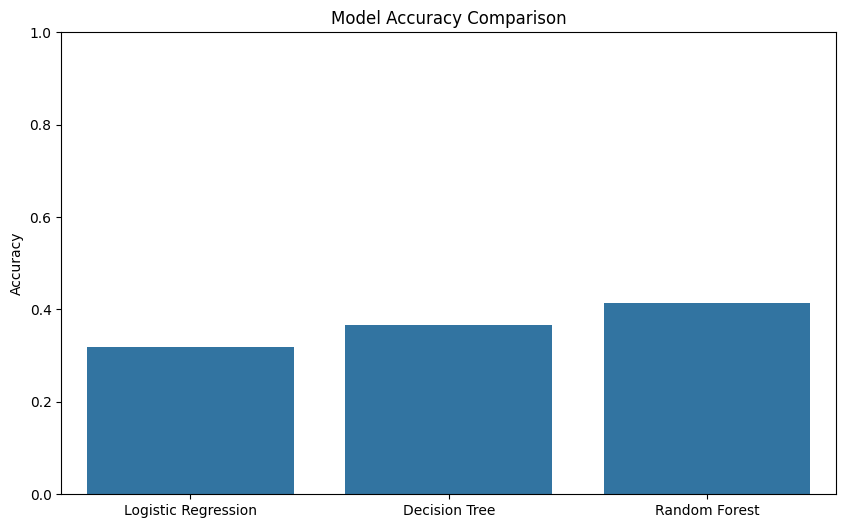

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

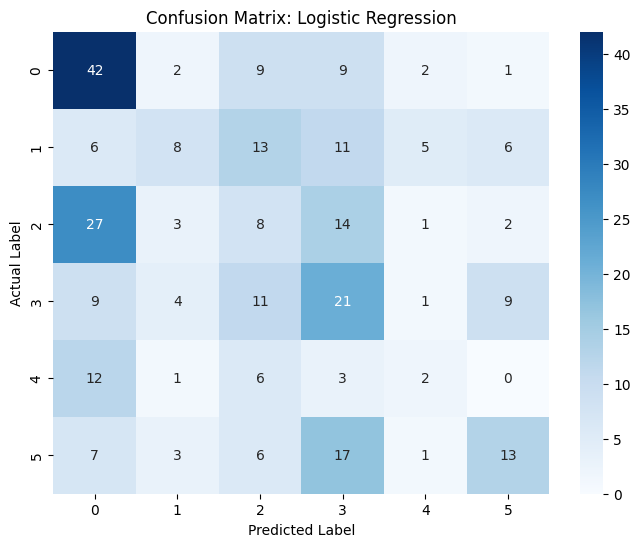

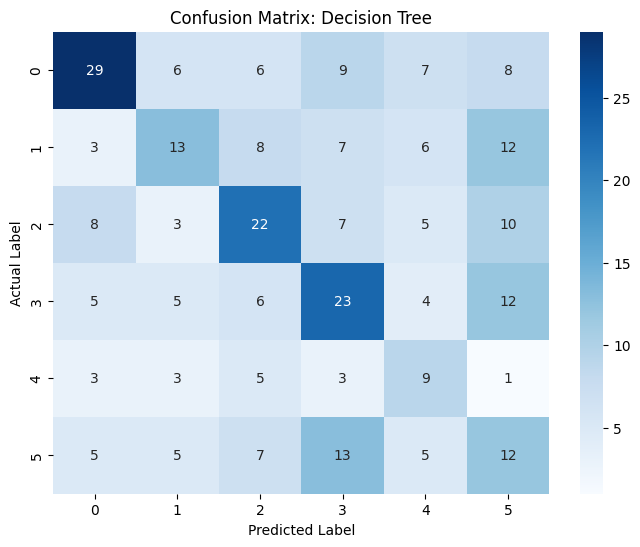

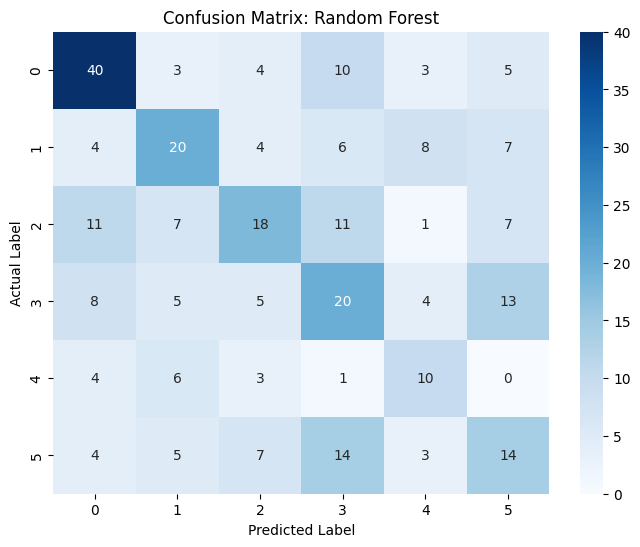

In [ ]:
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix: Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix: Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix: Random Forest")

Ini adalah matriks kebingungan (confusion matrix) untuk model Random Forest. Matriks ini menunjukkan performa model dalam memprediksi kelas-kelas berbeda. Di sepanjang sumbu x, terdapat label ‘Predicted Label’ yang menunjukkan kelas yang diprediksi oleh model (dari 0 hingga 4). Begitu pula di sepanjang sumbu y, terdapat label ‘Actual Label’ yang menunjukkan kelas sebenarnya (juga dari 0 hingga 4). Setiap sel dalam matriks mewakili jumlah prediksi untuk setiap pasangan kelas aktual vs. kelas yang diprediksi. Diagonal dari kiri atas ke kanan bawah menunjukkan prediksi yang benar (true positives) di mana label yang diprediksi dan aktual cocok.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
def plot_metrics(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    metrics = ['Precision', 'Recall', 'F1-Score']
    scores = [precision, recall, f1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics, y=scores)
    plt.title(f'{model_name} Metrics')
    plt.ylim(0, 1)
    plt.show()

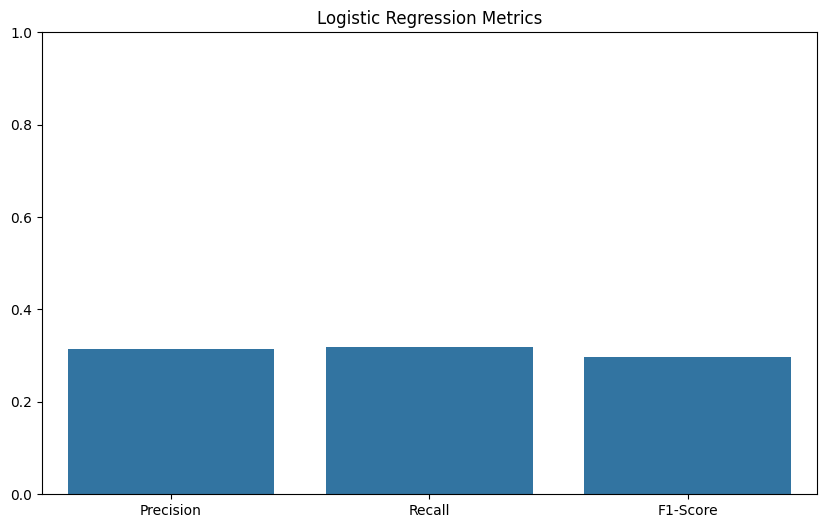

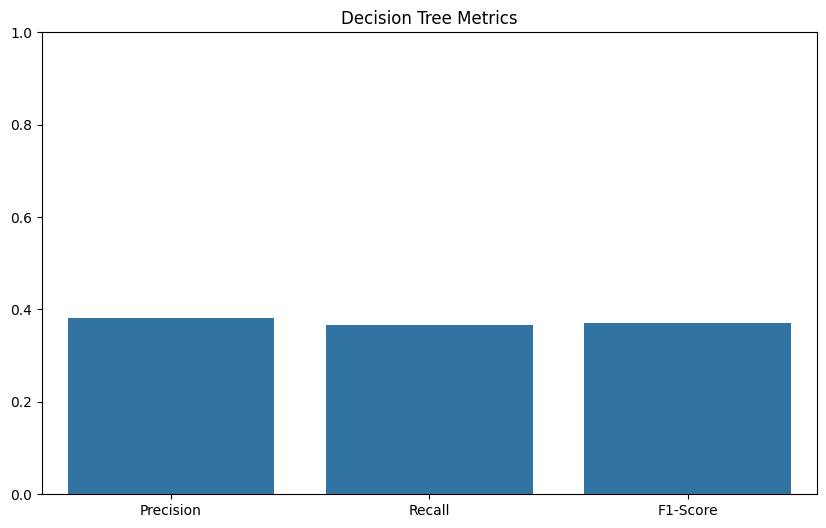

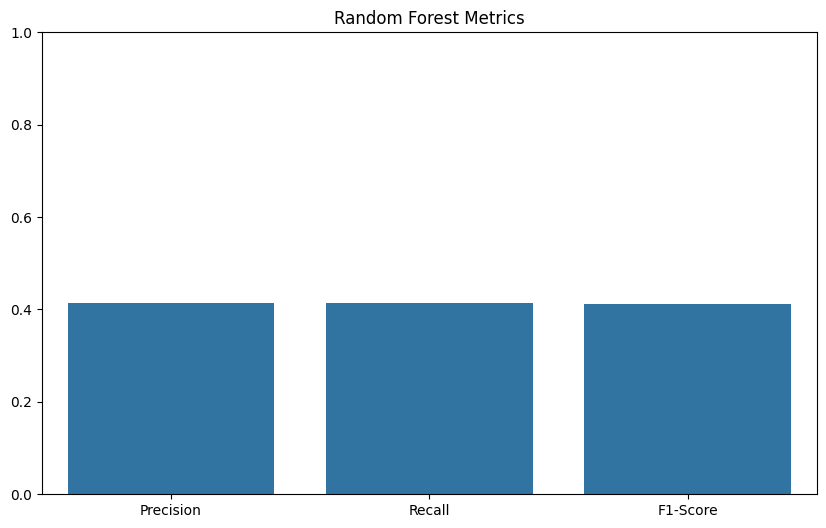

In [ ]:
plot_metrics(y_test, y_pred_lr, "Logistic Regression")
plot_metrics(y_test, y_pred_dt, "Decision Tree")
plot_metrics(y_test, y_pred_rf, "Random Forest")

Gambar ini menampilkan sebuah diagram batang berjudul “Logistic Regression Metrics,” yang menunjukkan tiga metrik berbeda: Presisi (Precision), Recall, dan F1-Score. Setiap metrik direpresentasikan oleh batang biru yang menunjukkan nilainya. Sumbu y pada diagram berkisar dari 0 hingga 1.0, menunjukkan bahwa metrik diukur sebagai proporsi atau persentase. Nilai presisi, recall, dan F1-Score tidak diberikan secara eksplisit dalam gambar, tetapi dapat diperkirakan berdasarkan tinggi setiap batang relatif terhadap skala sumbu y. Gambar ini relevan untuk mengevaluasi performa model regresi logistik dalam konteks pembelajaran mesin atau analisis statistik. Diagram ini memberikan perbandingan visual dari metrik kinerja kunci ini, yang sangat penting untuk memahami seberapa baik model memprediksi hasil.